# New Code

In [ ]:
import cv2
import dlib
import os
import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [197]:
DATA_PATH = "./drive/MyDrive"  # if the data uploaded to the google drive.
array3D_lip_landmarks_path = "lip_landmarks.npy"# os.path.join(DATA_PATH, "lip_landmarks.npy")

In [162]:
DATA_PATH = "./drive/MyDrive"  # if the data uploaded to the google drive.
textgrid_intervals_path = "parsed_textgrid_with_frames.json"  # os.path.join(DATA_PATH, "parsed_textgrid_with_letters.json")

## Create the .npy file that contains the landmarks in each frame in each video

In [155]:
# Function to process frames of a video and extract lip landmarks
def process_video(video_path, predictor, detector):
    cap = cv2.VideoCapture(video_path)
    frame_landmarks = []
    frame_aspect_ratios = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        lip_points = detect_lips(frame, predictor, detector)
        if lip_points:
            frame_landmarks.append(lip_points)
        else:
            frame_landmarks.append(None)

    cap.release()
    gc.collect()
    return frame_landmarks

In [156]:
# Function to detect lips from an image
def detect_lips(image, predictor, detector):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)
        lip_points = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(48, 68)]
        return lip_points
    return None

In [158]:
# Main function to process all videos
def process_all_videos(video_folder, predictor, detector):
    video_files = [f for f in os.listdir(video_folder) if f.endswith(('.mp4', '.avi', '.mov'))]
    all_landmarks = {}

    for video in video_files:
        video_path = os.path.join(video_folder, video)
        print(f"Processing {video}...")
        frame_landmarks = process_video(video_path, predictor, detector)
        all_landmarks[video] = frame_landmarks
        gc.collect()

    # Save the landmarks as a NumPy file
    np.save("lip_landmarks_deneme.npy", all_landmarks)

In [159]:
# Load pre-trained model
data_path = "./drive/MyDrive"
# Define the video folder
nags_word_videos_folder = "./drive/MyDrive/words_0984_1968"

pretrained_model_path = os.path.join(data_path, "shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(pretrained_model_path)

In [161]:
# Process all videos
process_all_videos(nags_word_videos_folder, predictor, detector)

## Create new csv files of scores from the npy file of landmarks

### Use Aspect Ratio for example

In [165]:
array3D_lip_landmarks_path

'lip_landmarks.npy'

In [164]:
array3D_lip_landmarks_path = "lip_landmarks.npy"

In [146]:
# Load the .npy file
# lip_landmarks_data = np.load("lip_landmarks.npy", allow_pickle=True).item()

In [166]:
# Define function to extract lip aspect ratio
def lip_aspect_ratio(lip_points):
    # Lip indices for vertical and horizontal distances
    vertical_1 = np.linalg.norm(np.array(lip_points[2]) - np.array(lip_points[10]))
    vertical_2 = np.linalg.norm(np.array(lip_points[4]) - np.array(lip_points[8]))
    horizontal = np.linalg.norm(np.array(lip_points[0]) - np.array(lip_points[6]))

    return (vertical_1 + vertical_2) / (2.0 * horizontal)

In [167]:
# Function to calculate aspect ratio from saved .npy file
def calculate_aspect_ratios_from_npy(npy_file):
    all_landmarks = np.load(npy_file, allow_pickle=True).item()
    all_data = {}

    for video, frames in all_landmarks.items():
        frame_aspect_ratios = []
        for lip_points in frames:
            if lip_points:
                frame_aspect_ratios.append(lip_aspect_ratio(lip_points))
            else:
                frame_aspect_ratios.append(None)
        all_data[video] = frame_aspect_ratios

    # Convert to DataFrame
    df = pd.DataFrame.from_dict(all_data, orient='index')
    df.index.name = "Video Name"
    df.columns = [f"Frame_{i}" for i in range(df.shape[1])]

    # Save to CSV
    df.to_csv("lip_aspect_ratios_from_npy.csv", index=True)
    return df

In [168]:
# Calculate aspect ratios from .npy file and save as CSV
calculate_aspect_ratios_from_npy(array3D_lip_landmarks_path)  # "lip_landmarks.npy"

Frame_0   Frame_1   Frame_2   Frame_3   Frame_4   Frame_5  \
Video Name                                                                  
0_kukbu.mp4    0.541288  0.525172  0.535591  0.541224  0.548818  0.520178   
8_tapu.mp4     0.395752  0.389422  0.410278  0.406376  0.408998  0.423556   
81_vakit.mp4   0.424371  0.415432  0.414739  0.429004  0.451781  0.450433   
44_ufku.mp4    0.495575  0.488290  0.483950  0.472272  0.472602  0.468317   
54_duvak.mp4   0.512188  0.488187  0.495409  0.497715  0.495502  0.504806   
...                 ...       ...       ...       ...       ...       ...   
25_kakpu.mp4   0.450069  0.465119  0.470520  0.465440  0.472689  0.479936   
41_kakpak.mp4  0.509203  0.520736  0.513608  0.516038  0.523049  0.511463   
45_kupku.mp4   0.561858  0.527767  0.540703  0.554354  0.562383  0.535591   
78_subay.mp4   0.483282  0.480333  0.478197  0.485199  0.487699  0.490212   
31_kukpu.mp4   0.530208  0.522792  0.546736  0.535996  0.525169  0.541110   

                Frame_6   Frame_7   Frame_8   Frame_9  ...  Frame_72  \
Video Name                                             ...             
0_kukbu.mp4    0.520000  0.530660  0.495024  0.489816  ...       NaN   
8_tapu.mp4     0.424738  0.410037  0.405819  0.365409  ...       NaN   
81_vakit.mp4   0.462025  0.471457  0.467075  0.467505  ...       NaN   
44_ufku.mp4    0.470848  0.448988  0.476943  0.445986  ...       NaN   
54_duvak.mp4   0.495495  0.514287  0.512001  0.523830  ...       NaN   
...                 ...       ...       ...       ...  ...       ...   
25_kakpu.mp4   0.497879  0.488844  0.513974  0.521326  ...       NaN   
41_kakpak.mp4  0.539389  0.532105  0.539767  0.541579  ...  0.419728   
45_kupku.mp4   0.534926  0.523003  0.518014  0.477426  ...       NaN   
78_subay.mp4   0.502556  0.495143  0.500006  0.497450  ...       NaN   
31_kukpu.mp4   0.551118  0.567329  0.546628  0.568600  ...       NaN   

               Frame_73  Frame_74  Frame_75  Frame_76  Frame_77  Frame_78  \
Video Name                                                                  
0_kukbu.mp4         NaN       NaN       NaN       NaN       NaN       NaN   
8_tapu.mp4          NaN       NaN       NaN       NaN       NaN       NaN   
81_vakit.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
44_ufku.mp4         NaN       NaN       NaN       NaN       NaN       NaN   
54_duvak.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
...                 ...       ...       ...       ...       ...       ...   
25_kakpu.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
41_kakpak.mp4  0.414266   0.42109  0.417875       NaN       NaN       NaN   
45_kupku.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
78_subay.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
31_kukpu.mp4        NaN       NaN       NaN       NaN       NaN       NaN   

               Frame_79  Frame_80  Frame_81  
Video Name                                   
0_kukbu.mp4         NaN       NaN       NaN  
8_tapu.mp4          NaN       NaN       NaN  
81_vakit.mp4        NaN       NaN       NaN  
44_ufku.mp4         NaN       NaN       NaN  
54_duvak.mp4        NaN       NaN       NaN  
...                 ...       ...       ...  
25_kakpu.mp4        NaN       NaN       NaN  
41_kakpak.mp4       NaN       NaN       NaN  
45_kupku.mp4        NaN       NaN       NaN  
78_subay.mp4        NaN       NaN       NaN  
31_kukpu.mp4        NaN       NaN       NaN  

[95 rows x 82 columns]

### Criss Cross Score

In [219]:
# Define function to extract lip aspect ratio
def criss_cross1(lip_points):
    # Lip indices for vertical and horizontal distances
    criss = np.linalg.norm(np.array(lip_points[5]) - np.array(lip_points[11]))
    cross = np.linalg.norm(np.array(lip_points[1]) - np.array(lip_points[7]))

    return (criss + cross) / 2.0

In [220]:
# Function to calculate aspect ratio from saved .npy file
def calculate_criss_cross1_from_npy(npy_file):
    all_landmarks = np.load(npy_file, allow_pickle=True).item()
    all_data = {}

    for video, frames in all_landmarks.items():
        frame_aspect_ratios = []
        for lip_points in frames:
            if lip_points:
                frame_aspect_ratios.append(criss_cross1(lip_points))
            else:
                frame_aspect_ratios.append(None)
        all_data[video] = frame_aspect_ratios

    # Convert to DataFrame
    df = pd.DataFrame.from_dict(all_data, orient='index')
    df.index.name = "Video Name"
    df.columns = [f"Frame_{i}" for i in range(df.shape[1])]

    # Save to CSV
    df.to_csv("criss_cross1_from_npy.csv", index=True)
    return df

In [221]:
# Calculate aspect ratios from .npy file and save as CSV
calculate_criss_cross1_from_npy(array3D_lip_landmarks_path)  # "lip_landmarks.npy"

Frame_0     Frame_1     Frame_2     Frame_3     Frame_4  \
Video Name                                                                  
0_kukbu.mp4    138.706778  140.456867  139.806626  139.806626  142.077758   
8_tapu.mp4     158.401389  160.561306  162.424579  161.243425  163.781454   
81_vakit.mp4   147.200222  147.130760  146.219492  149.070424  150.284054   
44_ufku.mp4    151.045684  148.589593  146.545044  145.430379  148.137931   
54_duvak.mp4   149.634893  145.569748  150.713950  151.395376  148.477972   
...                   ...         ...         ...         ...         ...   
25_kakpu.mp4   156.136904  152.744751  154.742344  154.300780  157.434660   
41_kakpak.mp4  160.351087  159.715131  161.484170  162.358499  159.939689   
45_kupku.mp4   144.848166  139.149789  140.699963  143.662252  141.721241   
78_subay.mp4   145.791974  141.546640  142.442080  143.114257  141.772705   
31_kukpu.mp4   144.499360  143.667633  143.449317  144.823571  141.659773   

                  Frame_5     Frame_6     Frame_7     Frame_8     Frame_9  \
Video Name                                                                  
0_kukbu.mp4    140.038362  140.897945  139.590790  139.825789  139.212079   
8_tapu.mp4     162.489672  158.748963  156.518903  151.861614  148.373715   
81_vakit.mp4   155.423463  158.091586  161.000927  162.815847  164.577635   
44_ufku.mp4    147.848465  147.481989  149.039829  147.444692  146.766460   
54_duvak.mp4   149.839306  147.603771  149.657133  148.511339  150.765278   
...                   ...         ...         ...         ...         ...   
25_kakpu.mp4   159.888868  157.875546  158.999820  157.544383  157.348611   
41_kakpak.mp4  156.699275  161.503796  162.436959  160.425847  163.042370   
45_kupku.mp4   140.517741  144.076355  138.225420  136.209237  136.008204   
78_subay.mp4   142.886489  141.546640  142.003325  144.702965  141.328722   
31_kukpu.mp4   143.422407  144.762209  142.421905  141.206939  141.733467   

               ...    Frame_72    Frame_73   Frame_74    Frame_75  Frame_76  \
Video Name     ...                                                            
0_kukbu.mp4    ...         NaN         NaN        NaN         NaN       NaN   
8_tapu.mp4     ...         NaN         NaN        NaN         NaN       NaN   
81_vakit.mp4   ...         NaN         NaN        NaN         NaN       NaN   
44_ufku.mp4    ...         NaN         NaN        NaN         NaN       NaN   
54_duvak.mp4   ...         NaN         NaN        NaN         NaN       NaN   
...            ...         ...         ...        ...         ...       ...   
25_kakpu.mp4   ...         NaN         NaN        NaN         NaN       NaN   
41_kakpak.mp4  ...  153.775602  158.504166  159.08104  156.924014       NaN   
45_kupku.mp4   ...         NaN         NaN        NaN         NaN       NaN   
78_subay.mp4   ...         NaN         NaN        NaN         NaN       NaN   
31_kukpu.mp4   ...         NaN         NaN        NaN         NaN       NaN   

               Frame_77  Frame_78  Frame_79  Frame_80  Frame_81  
Video Name                                                       
0_kukbu.mp4         NaN       NaN       NaN       NaN       NaN  
8_tapu.mp4          NaN       NaN       NaN       NaN       NaN  
81_vakit.mp4        NaN       NaN       NaN       NaN       NaN  
44_ufku.mp4         NaN       NaN       NaN       NaN       NaN  
54_duvak.mp4        NaN       NaN       NaN       NaN       NaN  
...                 ...       ...       ...       ...       ...  
25_kakpu.mp4        NaN       NaN       NaN       NaN       NaN  
41_kakpak.mp4       NaN       NaN       NaN       NaN       NaN  
45_kupku.mp4        NaN       NaN       NaN       NaN       NaN  
78_subay.mp4        NaN       NaN       NaN       NaN       NaN  
31_kukpu.mp4        NaN       NaN       NaN       NaN       NaN  

[95 rows x 82 columns]

In [222]:
# Define function to extract lip aspect ratio
def criss_cross2(lip_points):
    # Lip indices for vertical and horizontal distances
    criss = np.linalg.norm(np.array(lip_points[4]) - np.array(lip_points[10]))
    cross = np.linalg.norm(np.array(lip_points[2]) - np.array(lip_points[8]))

    return (criss + cross) / 2.0

In [223]:
# Function to calculate aspect ratio from saved .npy file
def calculate_criss_cross2_from_npy(npy_file):
    all_landmarks = np.load(npy_file, allow_pickle=True).item()
    all_data = {}

    for video, frames in all_landmarks.items():
        frame_aspect_ratios = []
        for lip_points in frames:
            if lip_points:
                frame_aspect_ratios.append(criss_cross2(lip_points))
            else:
                frame_aspect_ratios.append(None)
        all_data[video] = frame_aspect_ratios

    # Convert to DataFrame
    df = pd.DataFrame.from_dict(all_data, orient='index')
    df.index.name = "Video Name"
    df.columns = [f"Frame_{i}" for i in range(df.shape[1])]

    # Save to CSV
    df.to_csv("criss_cross2_from_npy.csv", index=True)
    return df

In [224]:
# Calculate aspect ratios from .npy file and save as CSV
calculate_criss_cross2_from_npy(array3D_lip_landmarks_path)  # "lip_landmarks.npy"

Frame_0     Frame_1     Frame_2     Frame_3     Frame_4  \
Video Name                                                                  
0_kukbu.mp4    116.723175  115.836091  117.171656  117.178477  118.966382   
8_tapu.mp4     111.233075  112.238703  115.107842  114.424789  115.841847   
81_vakit.mp4   109.180221  108.729861  107.615055  111.107958  115.336910   
44_ufku.mp4    121.905542  118.563437  117.238415  115.249637  117.726328   
54_duvak.mp4   121.723020  116.135584  120.162067  121.519214  118.386659   
...                   ...         ...         ...         ...         ...   
25_kakpu.mp4   116.127151  115.677634  119.558626  117.050593  119.720347   
41_kakpak.mp4  128.563729  129.843993  132.160177  130.982592  129.530889   
45_kupku.mp4   121.222933  117.172101  119.192905  119.854078  120.528194   
78_subay.mp4   114.620472  112.005580  113.393034  112.820643  113.010804   
31_kukpu.mp4   118.750929  117.441781  119.443479  119.096288  117.655542   

                  Frame_5     Frame_6     Frame_7     Frame_8     Frame_9  \
Video Name                                                                  
0_kukbu.mp4    114.949988  116.297797  115.832611  112.705368  112.504709   
8_tapu.mp4     118.059932  115.008326  110.845786  108.980141  101.559176   
81_vakit.mp4   116.877107  120.138730  124.172230  124.343368  125.284699   
44_ufku.mp4    116.318520  116.817077  114.389150  116.571543  112.545423   
54_duvak.mp4   121.751011  118.821038  122.386998  121.453427  124.108633   
...                   ...         ...         ...         ...         ...   
25_kakpu.mp4   122.385298  122.829512  122.675341  125.475398  125.923794   
41_kakpak.mp4  125.713281  133.139319  133.461659  132.537787  134.729614   
45_kupku.mp4   118.292204  120.998283  114.721178  112.937783  108.707038   
78_subay.mp4   113.901160  115.311198  114.576619  116.657466  113.496433   
31_kukpu.mp4   119.653969  121.448758  121.445300  119.203434  121.429252   

               ...    Frame_72    Frame_73    Frame_74    Frame_75  Frame_76  \
Video Name     ...                                                             
0_kukbu.mp4    ...         NaN         NaN         NaN         NaN       NaN   
8_tapu.mp4     ...         NaN         NaN         NaN         NaN       NaN   
81_vakit.mp4   ...         NaN         NaN         NaN         NaN       NaN   
44_ufku.mp4    ...         NaN         NaN         NaN         NaN       NaN   
54_duvak.mp4   ...         NaN         NaN         NaN         NaN       NaN   
...            ...         ...         ...         ...         ...       ...   
25_kakpu.mp4   ...         NaN         NaN         NaN         NaN       NaN   
41_kakpak.mp4  ...  113.167685  114.306171  116.519975  114.599867       NaN   
45_kupku.mp4   ...         NaN         NaN         NaN         NaN       NaN   
78_subay.mp4   ...         NaN         NaN         NaN         NaN       NaN   
31_kukpu.mp4   ...         NaN         NaN         NaN         NaN       NaN   

               Frame_77  Frame_78  Frame_79  Frame_80  Frame_81  
Video Name                                                       
0_kukbu.mp4         NaN       NaN       NaN       NaN       NaN  
8_tapu.mp4          NaN       NaN       NaN       NaN       NaN  
81_vakit.mp4        NaN       NaN       NaN       NaN       NaN  
44_ufku.mp4         NaN       NaN       NaN       NaN       NaN  
54_duvak.mp4        NaN       NaN       NaN       NaN       NaN  
...                 ...       ...       ...       ...       ...  
25_kakpu.mp4        NaN       NaN       NaN       NaN       NaN  
41_kakpak.mp4       NaN       NaN       NaN       NaN       NaN  
45_kupku.mp4        NaN       NaN       NaN       NaN       NaN  
78_subay.mp4        NaN       NaN       NaN       NaN       NaN  
31_kukpu.mp4        NaN       NaN       NaN       NaN       NaN  

[95 rows x 82 columns]

### Nags Ratio, a better aspect ratio I thought that would work with nags.

In [200]:
# Define function to extract nags ratio
def inner_lower_lip_vertical_horizontal_ratio(lip_points):
    distance_3_18 = np.linalg.norm(np.array(lip_points[3]) - np.array(lip_points[18]))
    distance_12_16 = np.linalg.norm(np.array(lip_points[12]) - np.array(lip_points[16]))

    return distance_3_18 / distance_12_16 if distance_12_16 != 0 else None

In [201]:
# Function to calculate nags ratio from saved .npy file
def calculate_inner_lower_lip_vertical_horizontal_ratios_from_npy(npy_file):
    all_landmarks = np.load(npy_file, allow_pickle=True).item()
    all_data = {}

    for video, frames in all_landmarks.items():
        frame_aspect_ratios = []
        for lip_points in frames:
            if lip_points:
                frame_aspect_ratios.append(inner_lower_lip_vertical_horizontal_ratio(lip_points))
            else:
                frame_aspect_ratios.append(None)
        all_data[video] = frame_aspect_ratios

    # Convert to DataFrame
    df = pd.DataFrame.from_dict(all_data, orient='index')
    df.index.name = "Video Name"
    df.columns = [f"Frame_{i}" for i in range(df.shape[1])]

    # Save to CSV
    df.to_csv("inner_lower_lip_vertical_horizontal_ratios_from_npy.csv", index=True)
    return df

In [202]:
# Calculate nags ratios from .npy file and save as CSV
df_aspect_ratios_from_npy = calculate_inner_lower_lip_vertical_horizontal_ratios_from_npy(array3D_lip_landmarks_path)  # "lip_landmarks.npy"
df_aspect_ratios_from_npy

Frame_0   Frame_1   Frame_2   Frame_3   Frame_4   Frame_5  \
Video Name                                                                  
0_kukbu.mp4    0.241999  0.226603  0.226283  0.240416  0.240469  0.218732   
8_tapu.mp4     0.202981  0.213099  0.220371  0.221505  0.232398  0.229484   
81_vakit.mp4   0.219159  0.221649  0.219696  0.238891  0.257169  0.276176   
44_ufku.mp4    0.222726  0.219432  0.209498  0.204594  0.204699  0.205629   
54_duvak.mp4   0.252133  0.242687  0.248733  0.241359  0.232431  0.251550   
...                 ...       ...       ...       ...       ...       ...   
25_kakpu.mp4   0.234700  0.242758  0.254221  0.258680  0.262840  0.268140   
41_kakpak.mp4  0.301840  0.305799  0.298389  0.296736  0.327649  0.327392   
45_kupku.mp4   0.282840  0.251675  0.248281  0.259734  0.268486  0.250036   
78_subay.mp4   0.269963  0.264429  0.255295  0.270684  0.264095  0.260898   
31_kukpu.mp4   0.249956  0.243631  0.261675  0.243429  0.227734  0.238792   

                Frame_6   Frame_7   Frame_8   Frame_9  ...  Frame_72  \
Video Name                                             ...             
0_kukbu.mp4    0.223792  0.232929  0.212068  0.192642  ...       NaN   
8_tapu.mp4     0.240983  0.217999  0.219163  0.155425  ...       NaN   
81_vakit.mp4   0.293439  0.296259  0.291874  0.294050  ...       NaN   
44_ufku.mp4    0.215985  0.195740  0.224078  0.186334  ...       NaN   
54_duvak.mp4   0.236945  0.271028  0.245542  0.278353  ...       NaN   
...                 ...       ...       ...       ...  ...       ...   
25_kakpu.mp4   0.289977  0.285771  0.306571  0.319820  ...       NaN   
41_kakpak.mp4  0.337490  0.329670  0.339079  0.345044  ...  0.208851   
45_kupku.mp4   0.243674  0.210219  0.222104  0.197718  ...       NaN   
78_subay.mp4   0.272397  0.268817  0.281201  0.251528  ...       NaN   
31_kukpu.mp4   0.257871  0.259878  0.258272  0.270299  ...       NaN   

               Frame_73  Frame_74  Frame_75  Frame_76  Frame_77  Frame_78  \
Video Name                                                                  
0_kukbu.mp4         NaN       NaN       NaN       NaN       NaN       NaN   
8_tapu.mp4          NaN       NaN       NaN       NaN       NaN       NaN   
81_vakit.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
44_ufku.mp4         NaN       NaN       NaN       NaN       NaN       NaN   
54_duvak.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
...                 ...       ...       ...       ...       ...       ...   
25_kakpu.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
41_kakpak.mp4  0.217663  0.213005  0.216795       NaN       NaN       NaN   
45_kupku.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
78_subay.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
31_kukpu.mp4        NaN       NaN       NaN       NaN       NaN       NaN   

               Frame_79  Frame_80  Frame_81  
Video Name                                   
0_kukbu.mp4         NaN       NaN       NaN  
8_tapu.mp4          NaN       NaN       NaN  
81_vakit.mp4        NaN       NaN       NaN  
44_ufku.mp4         NaN       NaN       NaN  
54_duvak.mp4        NaN       NaN       NaN  
...                 ...       ...       ...  
25_kakpu.mp4        NaN       NaN       NaN  
41_kakpak.mp4       NaN       NaN       NaN  
45_kupku.mp4        NaN       NaN       NaN  
78_subay.mp4        NaN       NaN       NaN  
31_kukpu.mp4        NaN       NaN       NaN  

[95 rows x 82 columns]

In [169]:
# Define function to extract nags ratio
def nags_ratio(lip_points):
    distance_3_9 = np.linalg.norm(np.array(lip_points[3]) - np.array(lip_points[9]))
    distance_7_11 = np.linalg.norm(np.array(lip_points[7]) - np.array(lip_points[11]))

    return distance_3_9 / distance_7_11 if distance_7_11 != 0 else None

In [170]:
# Function to calculate nags ratio from saved .npy file
def calculate_nags_ratios_from_npy(npy_file):
    all_landmarks = np.load(npy_file, allow_pickle=True).item()
    all_data = {}

    for video, frames in all_landmarks.items():
        frame_aspect_ratios = []
        for lip_points in frames:
            if lip_points:
                frame_aspect_ratios.append(nags_ratio(lip_points))
            else:
                frame_aspect_ratios.append(None)
        all_data[video] = frame_aspect_ratios

    # Convert to DataFrame
    df = pd.DataFrame.from_dict(all_data, orient='index')
    df.index.name = "Video Name"
    df.columns = [f"Frame_{i}" for i in range(df.shape[1])]

    # Save to CSV
    df.to_csv("nags_ratios_from_npy.csv", index=True)
    return df

In [171]:
# Calculate nags ratios from .npy file and save as CSV
df_aspect_ratios_from_npy = calculate_nags_ratios_from_npy(array3D_lip_landmarks_path)  # "lip_landmarks.npy"
df_aspect_ratios_from_npy

Frame_0   Frame_1   Frame_2   Frame_3   Frame_4   Frame_5  \
Video Name                                                                  
0_kukbu.mp4    0.804639  0.775644  0.783599  0.797972  0.807936  0.783900   
8_tapu.mp4     0.591870  0.579832  0.606219  0.610555  0.605194  0.633347   
81_vakit.mp4   0.632379  0.639679  0.636967  0.657026  0.686131  0.685751   
44_ufku.mp4    0.749415  0.745091  0.744211  0.734946  0.733208  0.727487   
54_duvak.mp4   0.765663  0.740812  0.740869  0.735262  0.737166  0.753647   
...                 ...       ...       ...       ...       ...       ...   
25_kakpu.mp4   0.664483  0.683383  0.700036  0.685682  0.692326  0.703517   
41_kakpak.mp4  0.737429  0.761560  0.765257  0.753297  0.763258  0.762446   
45_kupku.mp4   0.826707  0.806347  0.809155  0.810961  0.838601  0.807587   
78_subay.mp4   0.719716  0.726605  0.726730  0.734327  0.740135  0.734394   
31_kukpu.mp4   0.784036  0.774612  0.786564  0.766127  0.785096  0.787343   

                Frame_6   Frame_7   Frame_8   Frame_9  ...  Frame_72  \
Video Name                                             ...             
0_kukbu.mp4    0.777598  0.790133  0.759653  0.743406  ...       NaN   
8_tapu.mp4     0.637038  0.624497  0.628360  0.552873  ...       NaN   
81_vakit.mp4   0.699284  0.705513  0.689189  0.702671  ...       NaN   
44_ufku.mp4    0.746118  0.700666  0.725785  0.703569  ...       NaN   
54_duvak.mp4   0.744429  0.766413  0.765214  0.789487  ...       NaN   
...                 ...       ...       ...       ...  ...       ...   
25_kakpu.mp4   0.739418  0.715261  0.775376  0.777112  ...       NaN   
41_kakpak.mp4  0.777382  0.764658  0.775043  0.766796  ...  0.612656   
45_kupku.mp4   0.796524  0.781893  0.771992  0.719676  ...       NaN   
78_subay.mp4   0.748050  0.748050  0.730464  0.745980  ...       NaN   
31_kukpu.mp4   0.783480  0.831613  0.809461  0.823763  ...       NaN   

               Frame_73  Frame_74  Frame_75  Frame_76  Frame_77  Frame_78  \
Video Name                                                                  
0_kukbu.mp4         NaN       NaN       NaN       NaN       NaN       NaN   
8_tapu.mp4          NaN       NaN       NaN       NaN       NaN       NaN   
81_vakit.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
44_ufku.mp4         NaN       NaN       NaN       NaN       NaN       NaN   
54_duvak.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
...                 ...       ...       ...       ...       ...       ...   
25_kakpu.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
41_kakpak.mp4  0.598973  0.608133  0.603076       NaN       NaN       NaN   
45_kupku.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
78_subay.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
31_kukpu.mp4        NaN       NaN       NaN       NaN       NaN       NaN   

               Frame_79  Frame_80  Frame_81  
Video Name                                   
0_kukbu.mp4         NaN       NaN       NaN  
8_tapu.mp4          NaN       NaN       NaN  
81_vakit.mp4        NaN       NaN       NaN  
44_ufku.mp4         NaN       NaN       NaN  
54_duvak.mp4        NaN       NaN       NaN  
...                 ...       ...       ...  
25_kakpu.mp4        NaN       NaN       NaN  
41_kakpak.mp4       NaN       NaN       NaN  
45_kupku.mp4        NaN       NaN       NaN  
78_subay.mp4        NaN       NaN       NaN  
31_kukpu.mp4        NaN       NaN       NaN  

[95 rows x 82 columns]

### Lower Lip Thickness Score

In [172]:
def lower_lip_height(lip_points):
    """Computes the vertical distance between the lower part of the lower lip and the upper part of the upper lip."""
    vertical = np.linalg.norm(np.array(lip_points[9]) - np.array(lip_points[18]))

    return vertical

In [173]:
# Function to calculate nags ratio from saved .npy file
def calculate_lower_lip_height_from_npy(npy_file):
    all_landmarks = np.load(npy_file, allow_pickle=True).item()
    all_data = {}

    for video, frames in all_landmarks.items():
        frame_aspect_ratios = []
        for lip_points in frames:
            if lip_points:
                frame_aspect_ratios.append(lower_lip_height(lip_points))
            else:
                frame_aspect_ratios.append(None)
        all_data[video] = frame_aspect_ratios

    # Convert to DataFrame
    df = pd.DataFrame.from_dict(all_data, orient='index')
    df.index.name = "Video Name"
    df.columns = [f"Frame_{i}" for i in range(df.shape[1])]

    # Save to CSV
    df.to_csv("lower_lip_height_from_npy.csv", index=True)
    return df

In [174]:
# Calculate nags ratios from .npy file and save as CSV
df_lower_lip_height_from_npy = calculate_lower_lip_height_from_npy(array3D_lip_landmarks_path)  # "lip_landmarks.npy"
df_lower_lip_height_from_npy

Frame_0    Frame_1    Frame_2    Frame_3    Frame_4  \
Video Name                                                             
0_kukbu.mp4    61.008196  61.008196  62.008064  61.008196  63.000000   
8_tapu.mp4     47.010637  45.011110  48.010416  48.010416  46.043458   
81_vakit.mp4   47.000000  48.000000  48.010416  48.000000  49.010203   
44_ufku.mp4    63.031738  62.008064  63.031738  61.032778  63.031738   
54_duvak.mp4   59.008474  57.008771  58.000000  59.000000  59.008474   
...                  ...        ...        ...        ...        ...   
25_kakpu.mp4   53.009433  53.000000  53.009433  51.000000  53.009433   
41_kakpak.mp4  53.000000  55.000000  57.000000  56.000000  52.000000   
45_kupku.mp4   62.008064  61.008196  64.007812  63.000000  64.007812   
78_subay.mp4   51.000000  51.009803  52.009614  51.009803  52.009614   
31_kukpu.mp4   62.008064  61.000000  60.008333  61.008196  63.000000   

                 Frame_5    Frame_6    Frame_7    Frame_8    Frame_9  ...  \
Video Name                                                            ...   
0_kukbu.mp4    63.007936  62.008064  61.008196  60.033324  61.008196  ...   
8_tapu.mp4     50.039984  47.042534  49.040799  47.042534  48.010416  ...   
81_vakit.mp4   46.010868  46.000000  47.010637  48.010416  49.010203  ...   
44_ufku.mp4    63.000000  62.032250  61.032778  59.033889  62.008064  ...   
54_duvak.mp4   59.008474  59.000000  57.000000  60.008333  58.008620  ...   
...                  ...        ...        ...        ...        ...  ...   
25_kakpu.mp4   54.037024  54.037024  53.009433  54.009258  53.009433  ...   
41_kakpak.mp4  49.010203  53.000000  52.009614  52.000000  51.009803  ...   
45_kupku.mp4   62.008064  63.007936  64.031242  61.008196  59.008474  ...   
78_subay.mp4   52.000000  52.009614  52.000000  50.009999  54.009258  ...   
31_kukpu.mp4   63.000000  62.000000  65.000000  63.000000  63.007936  ...   

               Frame_72   Frame_73  Frame_74  Frame_75  Frame_76  Frame_77  \
Video Name                                                                   
0_kukbu.mp4         NaN        NaN       NaN       NaN       NaN       NaN   
8_tapu.mp4          NaN        NaN       NaN       NaN       NaN       NaN   
81_vakit.mp4        NaN        NaN       NaN       NaN       NaN       NaN   
44_ufku.mp4         NaN        NaN       NaN       NaN       NaN       NaN   
54_duvak.mp4        NaN        NaN       NaN       NaN       NaN       NaN   
...                 ...        ...       ...       ...       ...       ...   
25_kakpu.mp4        NaN        NaN       NaN       NaN       NaN       NaN   
41_kakpak.mp4      49.0  48.010416      50.0      48.0       NaN       NaN   
45_kupku.mp4        NaN        NaN       NaN       NaN       NaN       NaN   
78_subay.mp4        NaN        NaN       NaN       NaN       NaN       NaN   
31_kukpu.mp4        NaN        NaN       NaN       NaN       NaN       NaN   

               Frame_78  Frame_79  Frame_80  Frame_81  
Video Name                                             
0_kukbu.mp4         NaN       NaN       NaN       NaN  
8_tapu.mp4          NaN       NaN       NaN       NaN  
81_vakit.mp4        NaN       NaN       NaN       NaN  
44_ufku.mp4         NaN       NaN       NaN       NaN  
54_duvak.mp4        NaN       NaN       NaN       NaN  
...                 ...       ...       ...       ...  
25_kakpu.mp4        NaN       NaN       NaN       NaN  
41_kakpak.mp4       NaN       NaN       NaN       NaN  
45_kupku.mp4        NaN       NaN       NaN       NaN  
78_subay.mp4        NaN       NaN       NaN       NaN  
31_kukpu.mp4        NaN       NaN       NaN       NaN  

[95 rows x 82 columns]

### Lower Lip Thickness via Area

In [175]:
# Function to compute mouth opening area
def lower_lip_area(landmarks_data):
    """Computes the convex hull area of the given inner lip points."""
    selected_indices = [8, 9, 10, 17, 18, 19]
    mouth_areas = []

    for frame in landmarks_data:
        selected_points = np.array([frame[i] for i in selected_indices])
        if len(selected_points) > 0:
            hull = cv2.convexHull(selected_points)  # Compute convex hull
            area = cv2.contourArea(hull)  # Compute area of convex hull
            mouth_areas.append(area)
        else:
            mouth_areas.append(None)

    return mouth_areas

In [176]:
# Function to calculate mouth opening area from saved .npy file
def calculate_lower_lip_area_from_npy(npy_file):
    all_landmarks = np.load(npy_file, allow_pickle=True).item()
    all_data = {}

    for video, frames in all_landmarks.items():
        frame_areas = lower_lip_area(frames)
        all_data[video] = frame_areas

    # Convert to DataFrame
    df = pd.DataFrame.from_dict(all_data, orient='index')
    df.index.name = "Video Name"
    df.columns = [f"Frame_{i}" for i in range(df.shape[1])]

    # Save to CSV
    df.to_csv("lip_thickness_area_from_npy.csv", index=True)
    return df

In [177]:
df_lower_lip_area_from_npy = calculate_lower_lip_area_from_npy(array3D_lip_landmarks_path)  # "lip_landmarks.npy"
df_lower_lip_area_from_npy

Frame_0  Frame_1  Frame_2  Frame_3  Frame_4  Frame_5  Frame_6  \
Video Name                                                                     
0_kukbu.mp4     3273.0   3347.5   3357.5   3363.0   3454.0   3274.0   3426.0   
8_tapu.mp4      2917.5   2974.0   3109.5   3028.5   2999.5   3239.5   2889.0   
81_vakit.mp4    2839.0   2844.0   2859.0   2937.0   2973.0   2818.5   2809.5   
44_ufku.mp4     3580.5   3468.5   3486.5   3355.0   3596.0   3498.0   3390.0   
54_duvak.mp4    3392.5   3210.0   3394.5   3528.5   3408.0   3528.5   3380.0   
...                ...      ...      ...      ...      ...      ...      ...   
25_kakpu.mp4    3333.5   3188.0   3365.5   3159.5   3250.0   3379.5   3190.5   
41_kakpak.mp4   3473.5   3492.0   3761.5   3657.0   3286.5   2951.5   3367.0   
45_kupku.mp4    3356.0   3370.5   3457.0   3507.5   3483.0   3400.0   3662.0   
78_subay.mp4    2954.0   2888.5   2956.0   2808.5   2838.5   2903.0   2997.5   
31_kukpu.mp4    3392.0   3509.5   3464.5   3587.5   3473.0   3576.0   3613.5   

               Frame_7  Frame_8  Frame_9  ...  Frame_72  Frame_73  Frame_74  \
Video Name                                ...                                 
0_kukbu.mp4     3246.5   3181.5   3229.5  ...       NaN       NaN       NaN   
8_tapu.mp4      2931.5   2831.5   2820.0  ...       NaN       NaN       NaN   
81_vakit.mp4    3012.0   3132.0   3090.5  ...       NaN       NaN       NaN   
44_ufku.mp4     3364.5   3339.0   3370.5  ...       NaN       NaN       NaN   
54_duvak.mp4    3428.5   3378.0   3309.0  ...       NaN       NaN       NaN   
...                ...      ...      ...  ...       ...       ...       ...   
25_kakpu.mp4    3208.0   3105.5   3084.0  ...       NaN       NaN       NaN   
41_kakpak.mp4   3446.0   3485.0   3446.0  ...    3052.0    3123.0    3320.0   
45_kupku.mp4    3417.5   3252.5   3129.0  ...       NaN       NaN       NaN   
78_subay.mp4    2892.0   2949.0   3000.5  ...       NaN       NaN       NaN   
31_kukpu.mp4    3523.0   3541.5   3619.0  ...       NaN       NaN       NaN   

               Frame_75  Frame_76  Frame_77  Frame_78  Frame_79  Frame_80  \
Video Name                                                                  
0_kukbu.mp4         NaN       NaN       NaN       NaN       NaN       NaN   
8_tapu.mp4          NaN       NaN       NaN       NaN       NaN       NaN   
81_vakit.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
44_ufku.mp4         NaN       NaN       NaN       NaN       NaN       NaN   
54_duvak.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
...                 ...       ...       ...       ...       ...       ...   
25_kakpu.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
41_kakpak.mp4    3171.5       NaN       NaN       NaN       NaN       NaN   
45_kupku.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
78_subay.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
31_kukpu.mp4        NaN       NaN       NaN       NaN       NaN       NaN   

               Frame_81  
Video Name               
0_kukbu.mp4         NaN  
8_tapu.mp4          NaN  
81_vakit.mp4        NaN  
44_ufku.mp4         NaN  
54_duvak.mp4        NaN  
...                 ...  
25_kakpu.mp4        NaN  
41_kakpak.mp4       NaN  
45_kupku.mp4        NaN  
78_subay.mp4        NaN  
31_kukpu.mp4        NaN  

[95 rows x 82 columns]

### Half Mouth Area, Lower lip inside, to upper lip outside area

In [178]:
# Function to compute mouth opening area
def mouth_opening_area(landmarks_data):
    """Computes the convex hull area of the given inner lip points."""
    selected_indices = [1, 2, 3, 4, 5, 12, 16, 17, 18, 19]
    mouth_areas = []

    for frame in landmarks_data:
        selected_points = np.array([frame[i] for i in selected_indices])
        if len(selected_points) > 0:
            hull = cv2.convexHull(selected_points)  # Compute convex hull
            area = cv2.contourArea(hull)  # Compute area of convex hull
            mouth_areas.append(area)
        else:
            mouth_areas.append(None)

    return mouth_areas

In [179]:
# Function to calculate mouth opening area from saved .npy file
def calculate_mouth_opening_area_from_npy(npy_file):
    all_landmarks = np.load(npy_file, allow_pickle=True).item()
    all_data = {}

    for video, frames in all_landmarks.items():
        frame_areas = mouth_opening_area(frames)
        all_data[video] = frame_areas

    # Convert to DataFrame
    df = pd.DataFrame.from_dict(all_data, orient='index')
    df.index.name = "Video Name"
    df.columns = [f"Frame_{i}" for i in range(df.shape[1])]

    # Save to CSV
    df.to_csv("mouth_opening_area_from_npy.csv", index=True)
    return df

In [180]:
df_mouth_opening_area_from_npy = calculate_mouth_opening_area_from_npy(array3D_lip_landmarks_path)  # "lip_landmarks.npy"
df_mouth_opening_area_from_npy

Frame_0  Frame_1  Frame_2  Frame_3  Frame_4  Frame_5  Frame_6  \
Video Name                                                                     
0_kukbu.mp4     6854.5   6885.0   6791.0   7017.0   7222.0   6822.5   6907.0   
8_tapu.mp4      6936.0   7218.0   7270.5   7271.5   7694.0   7466.5   7391.0   
81_vakit.mp4    6807.0   6652.0   6501.0   6700.0   7147.0   7663.0   8177.0   
44_ufku.mp4     7536.0   7278.5   6879.0   6948.0   6895.0   6948.0   6940.5   
54_duvak.mp4    7563.0   7112.5   7699.0   7639.5   7313.5   7554.0   7297.0   
...                ...      ...      ...      ...      ...      ...      ...   
25_kakpu.mp4    7161.5   6941.5   7099.5   6963.5   7187.5   7527.5   7762.5   
41_kakpak.mp4   8256.0   8259.5   8397.0   8412.0   8601.0   8301.0   8966.0   
45_kupku.mp4    7220.5   6384.5   6466.0   6759.0   7027.5   6653.5   6944.0   
78_subay.mp4    7348.0   6929.0   7042.0   7008.5   6988.5   7226.0   7145.5   
31_kukpu.mp4    7215.0   7136.0   7251.5   7224.5   7085.5   7162.5   7153.5   

               Frame_7  Frame_8  Frame_9  ...  Frame_72  Frame_73  Frame_74  \
Video Name                                ...                                 
0_kukbu.mp4     6698.0   6639.0   6561.0  ...       NaN       NaN       NaN   
8_tapu.mp4      6677.5   6461.0   5140.5  ...       NaN       NaN       NaN   
81_vakit.mp4    8652.5   8523.0   8686.0  ...       NaN       NaN       NaN   
44_ufku.mp4     6873.0   7040.5   6456.0  ...       NaN       NaN       NaN   
54_duvak.mp4    7520.0   7504.0   7828.0  ...       NaN       NaN       NaN   
...                ...      ...      ...  ...       ...       ...       ...   
25_kakpu.mp4    7725.5   7996.0   8140.0  ...       NaN       NaN       NaN   
41_kakpak.mp4   9027.0   8755.5   9242.5  ...    6937.0    7211.0    7190.5   
45_kupku.mp4    5890.0   6040.0   5155.0  ...       NaN       NaN       NaN   
78_subay.mp4    7090.0   7178.0   6843.0  ...       NaN       NaN       NaN   
31_kukpu.mp4    7412.5   7144.0   7102.5  ...       NaN       NaN       NaN   

               Frame_75  Frame_76  Frame_77  Frame_78  Frame_79  Frame_80  \
Video Name                                                                  
0_kukbu.mp4         NaN       NaN       NaN       NaN       NaN       NaN   
8_tapu.mp4          NaN       NaN       NaN       NaN       NaN       NaN   
81_vakit.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
44_ufku.mp4         NaN       NaN       NaN       NaN       NaN       NaN   
54_duvak.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
...                 ...       ...       ...       ...       ...       ...   
25_kakpu.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
41_kakpak.mp4    7284.0       NaN       NaN       NaN       NaN       NaN   
45_kupku.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
78_subay.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
31_kukpu.mp4        NaN       NaN       NaN       NaN       NaN       NaN   

               Frame_81  
Video Name               
0_kukbu.mp4         NaN  
8_tapu.mp4          NaN  
81_vakit.mp4        NaN  
44_ufku.mp4         NaN  
54_duvak.mp4        NaN  
...                 ...  
25_kakpu.mp4        NaN  
41_kakpak.mp4       NaN  
45_kupku.mp4        NaN  
78_subay.mp4        NaN  
31_kukpu.mp4        NaN  

[95 rows x 82 columns]

### Circularity, using 5 + 5 landmarks

In [210]:
# Function to compute mouth opening area, perimeter, and circularity
def mouth_circularity(landmarks_data):
    """Computes the convex hull area, perimeter, and circularity of the inner lip points."""
    selected_indices = [1, 2, 3, 4, 5, 7, 8, 9, 10, 11]
    mouth_areas = []
    mouth_perimeters = []
    circularity_scores = []

    for frame in landmarks_data:
        selected_points = np.array([frame[i] for i in selected_indices])
        if len(selected_points) > 0:
            hull = cv2.convexHull(selected_points)  # Compute convex hull
            area = cv2.contourArea(hull)  # Compute area of convex hull
            perimeter = cv2.arcLength(hull, closed=True)  # Compute perimeter of convex hull

            #mouth_areas.append(area)
            #mouth_perimeters.append(perimeter)

            # Compute circularity: (4 * π * Area) / (Perimeter^2), avoiding division by zero
            if perimeter > 0:
                circularity = (4 * np.pi * area) / (perimeter ** 2)
            else:
                circularity = None

            circularity_scores.append(circularity)
        else:
            #mouth_areas.append(None)
            #mouth_perimeters.append(None)
            circularity_scores.append(None)

    return circularity_scores # mouth_areas, mouth_perimeters, circularity_scores

In [211]:
# Function to calculate mouth opening area from saved .npy file
def calculate_mouth_circularity_from_npy(npy_file):
    all_landmarks = np.load(npy_file, allow_pickle=True).item()
    all_data = {}

    for video, frames in all_landmarks.items():
        frame_areas = mouth_circularity(frames)
        all_data[video] = frame_areas

    # Convert to DataFrame
    df = pd.DataFrame.from_dict(all_data, orient='index')
    df.index.name = "Video Name"
    df.columns = [f"Frame_{i}" for i in range(df.shape[1])]

    # Save to CSV
    df.to_csv("mouth_circularity_from_npy.csv", index=True)
    return df

In [212]:
df_mouth_circularity_from_npy = calculate_mouth_circularity_from_npy(array3D_lip_landmarks_path)  # "lip_landmarks.npy"
df_mouth_circularity_from_npy

Frame_0   Frame_1   Frame_2   Frame_3   Frame_4   Frame_5  \
Video Name                                                                  
0_kukbu.mp4    0.917034  0.911458  0.916813  0.917694  0.916006  0.910270   
8_tapu.mp4     0.848371  0.841859  0.849681  0.851277  0.850206  0.862930   
81_vakit.mp4   0.875106  0.870063  0.868289  0.872974  0.882720  0.875915   
44_ufku.mp4    0.903252  0.900361  0.902857  0.901265  0.900486  0.897839   
54_duvak.mp4   0.904892  0.902250  0.899579  0.901186  0.898803  0.903948   
...                 ...       ...       ...       ...       ...       ...   
25_kakpu.mp4   0.870817  0.880375  0.886045  0.878250  0.881367  0.882814   
41_kakpak.mp4  0.898955  0.905256  0.905520  0.904089  0.904372  0.895461   
45_kupku.mp4   0.911058  0.914220  0.917605  0.911235  0.915870  0.914278   
78_subay.mp4   0.891890  0.893565  0.895107  0.892727  0.897949  0.896028   
31_kukpu.mp4   0.907602  0.901893  0.906769  0.906155  0.907979  0.910073   

                Frame_6   Frame_7   Frame_8   Frame_9  ...  Frame_72  \
Video Name                                             ...             
0_kukbu.mp4    0.913130  0.914331  0.906999  0.907926  ...       NaN   
8_tapu.mp4     0.864447  0.854511  0.862626  0.841964  ...       NaN   
81_vakit.mp4   0.879097  0.886383  0.883407  0.877927  ...       NaN   
44_ufku.mp4    0.896828  0.888950  0.903578  0.890521  ...       NaN   
54_duvak.mp4   0.907964  0.908882  0.905908  0.909739  ...       NaN   
...                 ...       ...       ...       ...  ...       ...   
25_kakpu.mp4   0.891528  0.884126  0.894437  0.894755  ...       NaN   
41_kakpak.mp4  0.909520  0.905759  0.907958  0.908905  ...  0.861657   
45_kupku.mp4   0.914713  0.914228  0.916402  0.907588  ...       NaN   
78_subay.mp4   0.905508  0.902754  0.898752  0.898579  ...       NaN   
31_kukpu.mp4   0.912831  0.909469  0.913138  0.915050  ...       NaN   

               Frame_73  Frame_74  Frame_75  Frame_76  Frame_77  Frame_78  \
Video Name                                                                  
0_kukbu.mp4         NaN       NaN       NaN       NaN       NaN       NaN   
8_tapu.mp4          NaN       NaN       NaN       NaN       NaN       NaN   
81_vakit.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
44_ufku.mp4         NaN       NaN       NaN       NaN       NaN       NaN   
54_duvak.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
...                 ...       ...       ...       ...       ...       ...   
25_kakpu.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
41_kakpak.mp4  0.857933  0.862508  0.860348       NaN       NaN       NaN   
45_kupku.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
78_subay.mp4        NaN       NaN       NaN       NaN       NaN       NaN   
31_kukpu.mp4        NaN       NaN       NaN       NaN       NaN       NaN   

               Frame_79  Frame_80  Frame_81  
Video Name                                   
0_kukbu.mp4         NaN       NaN       NaN  
8_tapu.mp4          NaN       NaN       NaN  
81_vakit.mp4        NaN       NaN       NaN  
44_ufku.mp4         NaN       NaN       NaN  
54_duvak.mp4        NaN       NaN       NaN  
...                 ...       ...       ...  
25_kakpu.mp4        NaN       NaN       NaN  
41_kakpak.mp4       NaN       NaN       NaN  
45_kupku.mp4        NaN       NaN       NaN  
78_subay.mp4        NaN       NaN       NaN  
31_kukpu.mp4        NaN       NaN       NaN  

[95 rows x 82 columns]

### Horizontal Distance of inner lip corner

In [181]:
def horizontal_distance_inner_lip_corner(lip_points):
    """Computes the horizontal distance between the inner lip corners."""
    vertical = np.linalg.norm(np.array(lip_points[12]) - np.array(lip_points[16]))

    return vertical

In [182]:
# Function to calculate nags ratio from saved .npy file
def calculate_horizontal_distance_from_npy(npy_file):
    all_landmarks = np.load(npy_file, allow_pickle=True).item()
    all_data = {}

    for video, frames in all_landmarks.items():
        frame_aspect_ratios = []
        for lip_points in frames:
            if lip_points:
                frame_aspect_ratios.append(horizontal_distance_inner_lip_corner(lip_points))
            else:
                frame_aspect_ratios.append(None)
        all_data[video] = frame_aspect_ratios

    # Convert to DataFrame
    df = pd.DataFrame.from_dict(all_data, orient='index')
    df.index.name = "Video Name"
    df.columns = [f"Frame_{i}" for i in range(df.shape[1])]

    # Save to CSV
    df.to_csv("horizontal_distance_from_npy.csv", index=True)
    return df

In [183]:
# Calculate nags ratios from .npy file and save as CSV
df_lower_lip_height_from_npy = calculate_horizontal_distance_from_npy(array3D_lip_landmarks_path)  # "lip_landmarks.npy"
df_lower_lip_height_from_npy

Frame_0     Frame_1     Frame_2     Frame_3     Frame_4  \
Video Name                                                                  
0_kukbu.mp4    157.079598  159.113167  159.154013  158.113883  158.079094   
8_tapu.mp4     197.124326  197.091349  195.125601  194.126248  198.123699   
81_vakit.mp4   178.011236  176.011363  173.026010  176.011363  175.025712   
44_ufku.mp4    175.102827  173.233946  172.104619  176.229963  176.139150   
54_duvak.mp4   167.002994  165.027270  169.047331  170.073514  168.011904   
...                   ...         ...         ...         ...         ...   
25_kakpu.mp4   179.002793  173.011560  177.011299  174.002874  175.011428   
41_kakpak.mp4  179.025138  177.070607  181.002762  182.010989  177.045192   
45_kupku.mp4   152.029602  155.012903  153.052279  154.051939  149.030198   
78_subay.mp4   163.027605  159.012578  161.027948  159.028299  159.078597   
31_kukpu.mp4   160.078106  160.078106  153.052279  156.156972  158.079094   

                  Frame_5     Frame_6     Frame_7     Frame_8     Frame_9  \
Video Name                                                                  
0_kukbu.mp4    160.078106  161.111762  159.078597  165.109055  166.192659   
8_tapu.mp4     196.091815  191.065434  188.130274  187.130970  193.126901   
81_vakit.mp4   181.044193  184.024455  189.023808  185.043238  187.042776   
44_ufku.mp4    175.139944  176.181724  179.100530  174.103418  177.101666   
54_duvak.mp4   167.011976  169.026625  166.075284  167.026944  169.002959   
...                   ...         ...         ...         ...         ...   
25_kakpu.mp4   179.011173  176.011363  175.000000  173.002890  172.000000   
41_kakpak.mp4  174.103418  175.045708  179.069819  174.025860  177.002825   
45_kupku.mp4   156.028843  160.049992  157.050947  153.081678  157.114608   
78_subay.mp4   161.027948  158.028478  160.003125  160.028123  159.028299   
31_kukpu.mp4   155.003226  155.116086  150.119952  151.052971  148.030402   

               ...    Frame_72  Frame_73    Frame_74    Frame_75  Frame_76  \
Video Name     ...                                                           
0_kukbu.mp4    ...         NaN       NaN         NaN         NaN       NaN   
8_tapu.mp4     ...         NaN       NaN         NaN         NaN       NaN   
81_vakit.mp4   ...         NaN       NaN         NaN         NaN       NaN   
44_ufku.mp4    ...         NaN       NaN         NaN         NaN       NaN   
54_duvak.mp4   ...         NaN       NaN         NaN         NaN       NaN   
...            ...         ...       ...         ...         ...       ...   
25_kakpu.mp4   ...         NaN       NaN         NaN         NaN       NaN   
41_kakpak.mp4  ...  182.010989     184.0  188.023935  185.024323       NaN   
45_kupku.mp4   ...         NaN       NaN         NaN         NaN       NaN   
78_subay.mp4   ...         NaN       NaN         NaN         NaN       NaN   
31_kukpu.mp4   ...         NaN       NaN         NaN         NaN       NaN   

               Frame_77  Frame_78  Frame_79  Frame_80  Frame_81  
Video Name                                                       
0_kukbu.mp4         NaN       NaN       NaN       NaN       NaN  
8_tapu.mp4          NaN       NaN       NaN       NaN       NaN  
81_vakit.mp4        NaN       NaN       NaN       NaN       NaN  
44_ufku.mp4         NaN       NaN       NaN       NaN       NaN  
54_duvak.mp4        NaN       NaN       NaN       NaN       NaN  
...                 ...       ...       ...       ...       ...  
25_kakpu.mp4        NaN       NaN       NaN       NaN       NaN  
41_kakpak.mp4       NaN       NaN       NaN       NaN       NaN  
45_kupku.mp4        NaN       NaN       NaN       NaN       NaN  
78_subay.mp4        NaN       NaN       NaN       NaN       NaN  
31_kukpu.mp4        NaN       NaN       NaN       NaN       NaN  

[95 rows x 82 columns]

## Some Plots

In [184]:
import json

In [185]:
from scipy.signal import savgol_filter

# Function to plot histogram of aspect ratios
def plot_histogram(df, score_name="Aspect Ratio"):
    plt.figure(figsize=(10, 5))
    plt.hist(df.values.flatten(), bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel(score_name)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {score_name} Across All Videos")
    plt.grid()
    plt.show()


# Function to plot aspect ratio over frames for a given video
def plot_aspect_ratio(df, video_name, score_name="Aspect Ratio", apply_smoothing=False):
    if video_name in df.index:
        plt.figure(figsize=(10, 5))
        frame_numbers = range(len(df.columns))
        raw_values = df.loc[video_name].astype(float)

        if apply_smoothing:
            smoothed_values = savgol_filter(raw_values, window_length=min(11, len(raw_values)), polyorder=2, mode='nearest')
        else:
            smoothed_values = raw_values

        plt.plot(frame_numbers, smoothed_values, marker='o', linestyle='-', label=video_name)
        plt.xlabel("Frame Number")
        plt.ylabel(score_name)
        plt.title(f"{score_name} Over Time: {video_name}")
        plt.xticks(np.arange(0, len(df.columns), step=max(1, len(df.columns) // 20)))  # Set readable x-axis ticks
        plt.legend()
        plt.grid()
        plt.show()
    else:
        print("Video not found in DataFrame.")

In [186]:
# Function to plot aspect ratio over frames for a given video with vertical lines
def plot_aspect_ratio_smooth(df, video_name, json_file, score_name="Aspect Ratio", apply_smoothing=True):
    if video_name in df.index:
        plt.figure(figsize=(10, 5))
        frame_numbers = np.arange(len(df.columns))
        raw_values = df.loc[video_name].astype(float)

        plt.scatter(frame_numbers, raw_values, alpha=0.3, color='blue', label="Raw Data")

        if apply_smoothing:
            smoothed_values = savgol_filter(raw_values, window_length=min(11, len(raw_values)), polyorder=2, mode='nearest')
            plt.plot(frame_numbers, smoothed_values, color='blue', linewidth=2, label="Smoothed Curve")

        # Load JSON data
        with open(json_file, 'r', encoding='utf-16') as f:
            parsed_data = json.load(f)

        # Find matching dictionary entry
        for key, value in parsed_data.items():
            if video_name.split("_")[1].split(".")[0] == value['word']:
                L_frame_start = value['L_frame_start']
                L_frame_end = value['L_frame_end']
                letter = value['letter']
                plt.axvline(x=L_frame_start, color='red', linestyle='--', label= letter + " Start")
                plt.axvline(x=L_frame_end, color='green', linestyle='--', label= letter + " End")
                break

        plt.xlabel("Frame Number")
        plt.ylabel(score_name)
        plt.title(f"{score_name} Over Time: {video_name}")
        plt.xticks(np.arange(0, len(df.columns), step=max(1, len(df.columns) // 20)))  # Set readable x-axis ticks
        plt.legend()
        plt.grid()
        plt.show()
    else:
        print("Video not found in DataFrame.")

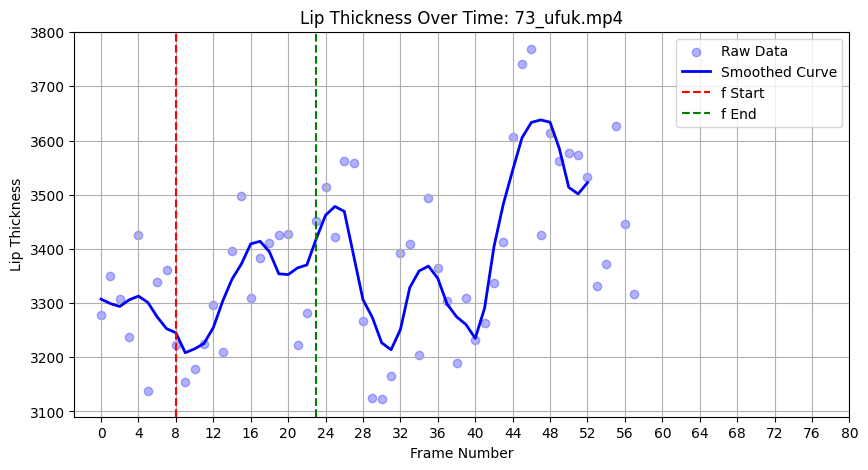

In [187]:
# Read the CSV file
df_from_csv = pd.read_csv("lip_thickness_area_from_npy.csv", index_col="Video Name")
plot_aspect_ratio_smooth(df_from_csv, "73_ufuk.mp4", "parsed_textgrid_with_frames.json", "Lip Thickness")


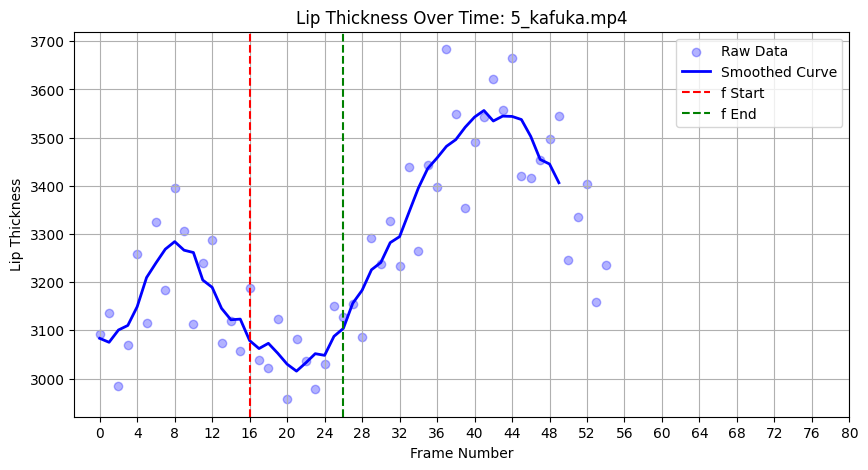

In [198]:
# Read the CSV file
df_from_csv = pd.read_csv("lip_thickness_area_from_npy.csv", index_col="Video Name")
plot_aspect_ratio_smooth(df_from_csv, "5_kafuka.mp4", "parsed_textgrid_with_frames.json", "Lip Thickness")


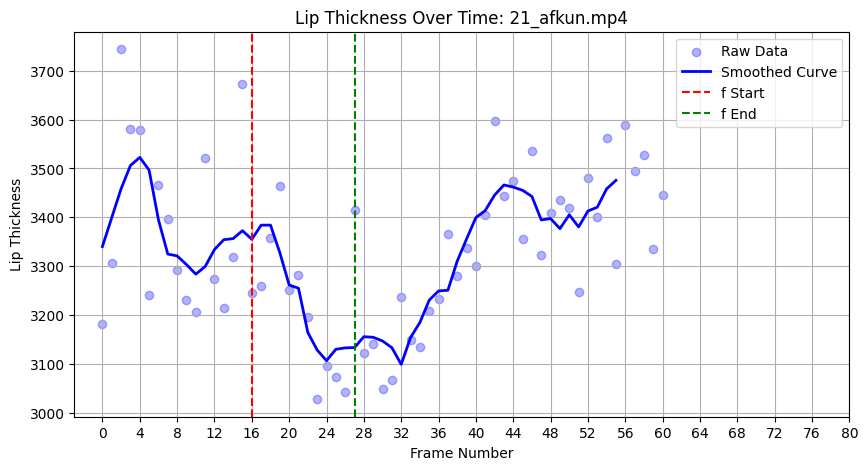

In [199]:
# Read the CSV file
df_from_csv = pd.read_csv("lip_thickness_area_from_npy.csv", index_col="Video Name")
plot_aspect_ratio_smooth(df_from_csv, "21_afkun.mp4", "parsed_textgrid_with_frames.json", "Lip Thickness")


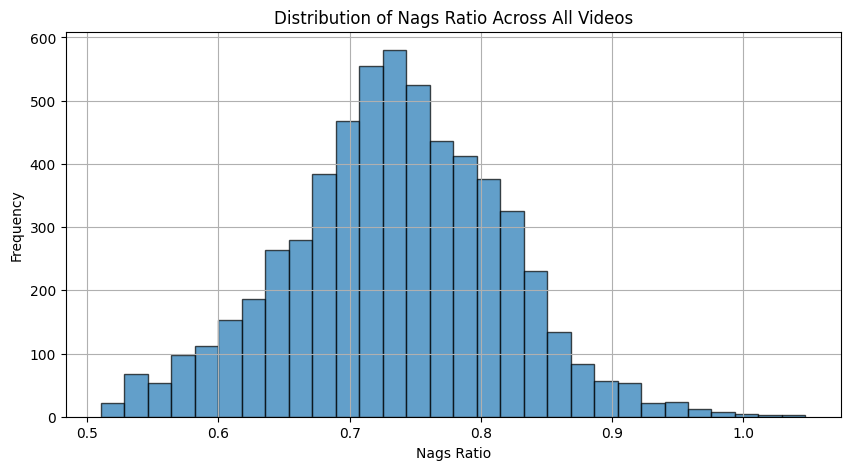

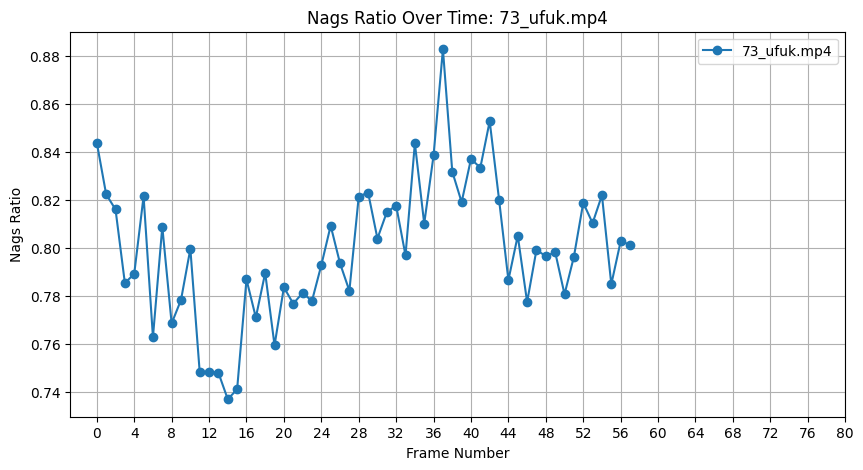

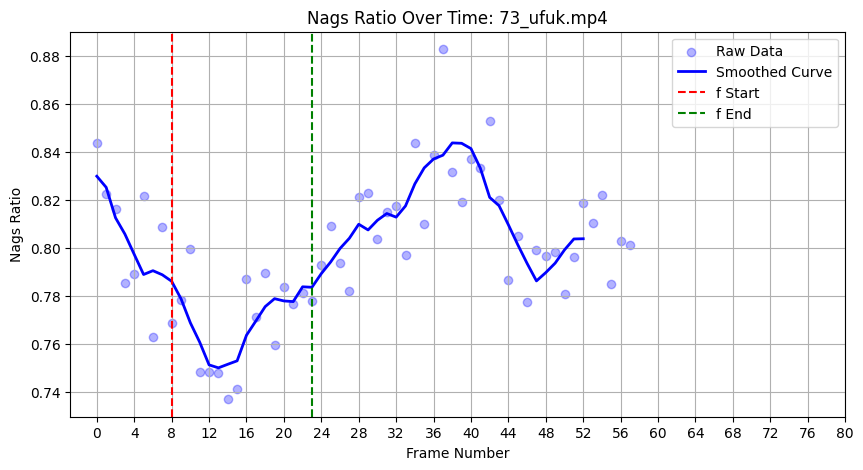

In [188]:
# Read the CSV file
df_from_csv = pd.read_csv("nags_ratios_from_npy.csv", index_col="Video Name")
# Example usage of plots
plot_histogram(df_from_csv, "Nags Ratio")
plot_aspect_ratio(df_from_csv, "73_ufuk.mp4", "Nags Ratio")  # 23_ufak 73_ufuk
plot_aspect_ratio_smooth(df_from_csv, "73_ufuk.mp4", "parsed_textgrid_with_frames.json", "Nags Ratio")  # 23_ufak 73_ufuk

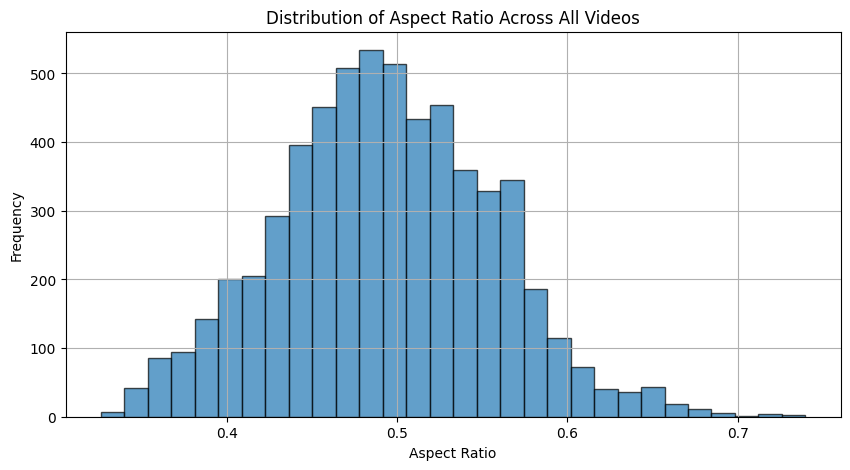

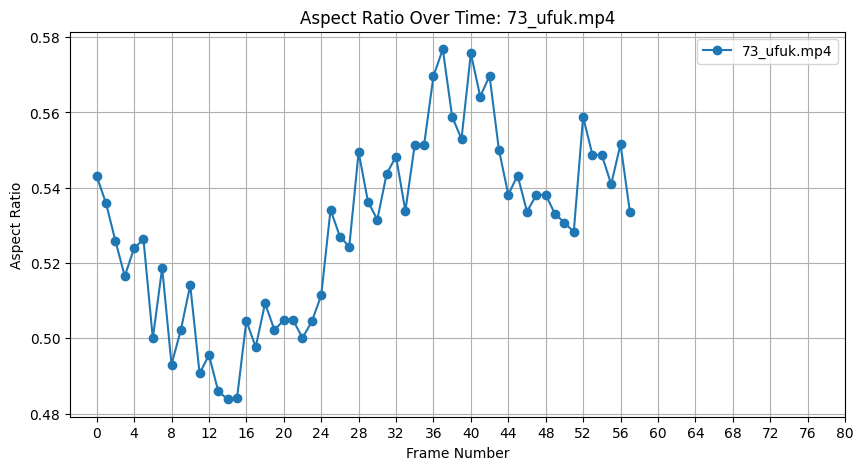

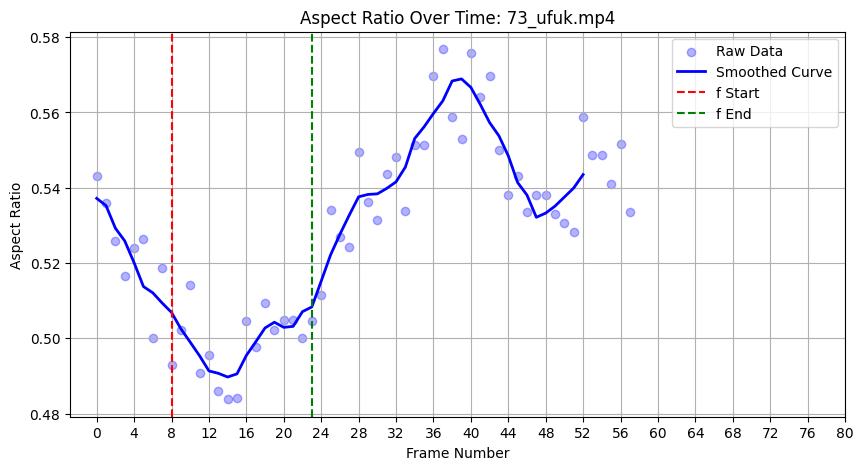

In [190]:
# Read the CSV file
df_from_csv = pd.read_csv("lip_aspect_ratios_from_npy.csv", index_col="Video Name")
# Example usage of plots
plot_histogram(df_from_csv, "Aspect Ratio")
plot_aspect_ratio(df_from_csv, "73_ufuk.mp4", "Aspect Ratio")
plot_aspect_ratio_smooth(df_from_csv, "73_ufuk.mp4", "parsed_textgrid_with_frames.json","Aspect Ratio")

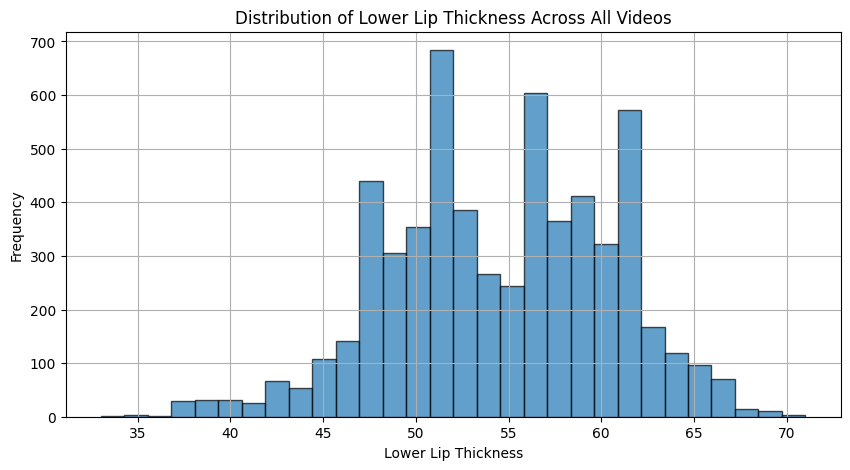

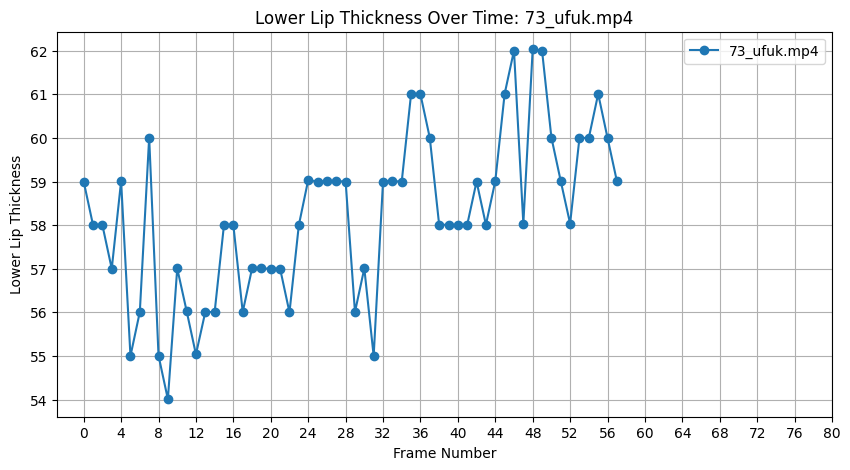

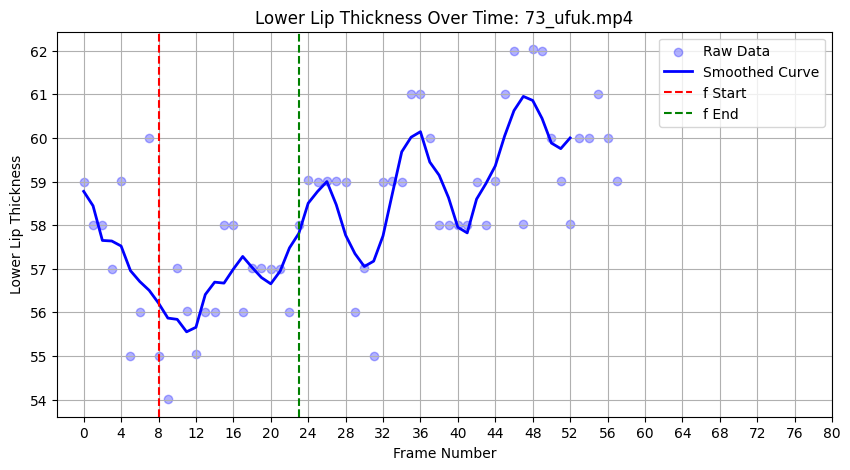

In [191]:
# Read the CSV file
df_from_csv = pd.read_csv("lower_lip_height_from_npy.csv", index_col="Video Name")
# Example usage of plots
plot_histogram(df_from_csv, "Lower Lip Thickness")
plot_aspect_ratio(df_from_csv, "73_ufuk.mp4", "Lower Lip Thickness")
plot_aspect_ratio_smooth(df_from_csv, "73_ufuk.mp4", "parsed_textgrid_with_frames.json","Lower Lip Thickness")

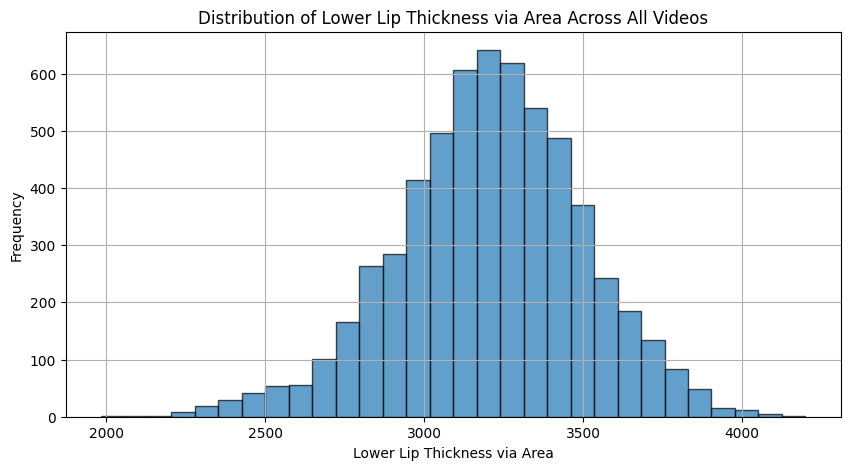

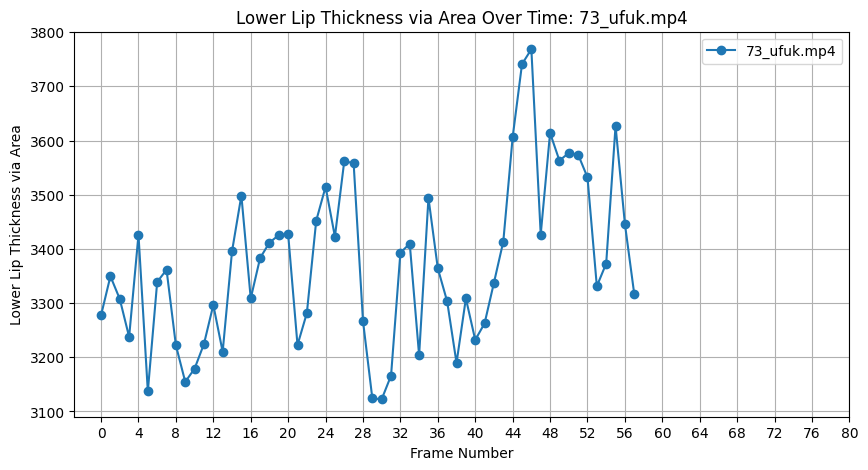

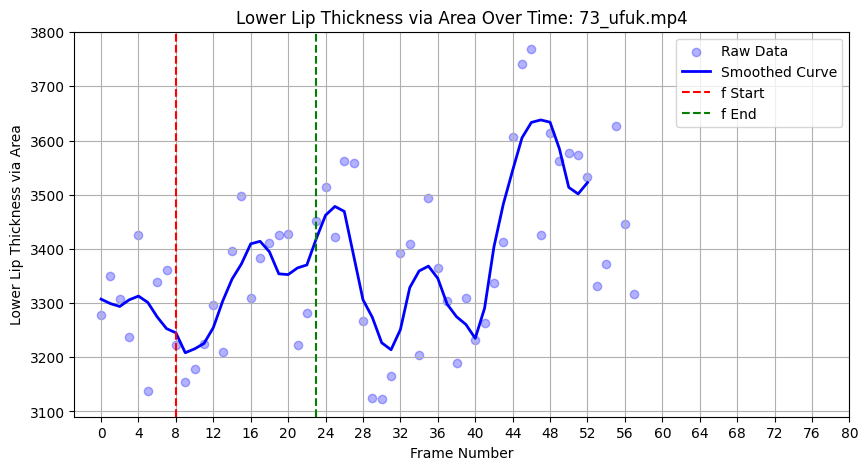

In [192]:
# Read the CSV file
df_from_csv = pd.read_csv("lip_thickness_area_from_npy.csv", index_col="Video Name")
# Example usage of plots
plot_histogram(df_from_csv, "Lower Lip Thickness via Area")
plot_aspect_ratio(df_from_csv, "73_ufuk.mp4", "Lower Lip Thickness via Area")
plot_aspect_ratio_smooth(df_from_csv, "73_ufuk.mp4", "parsed_textgrid_with_frames.json", "Lower Lip Thickness via Area")

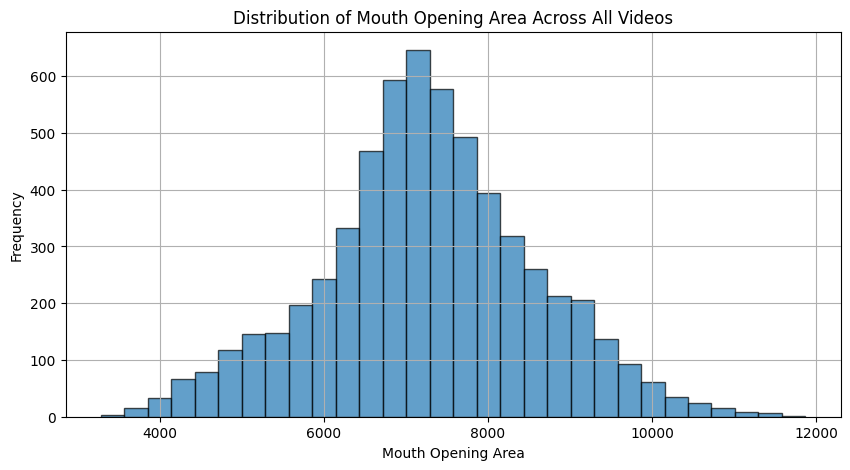

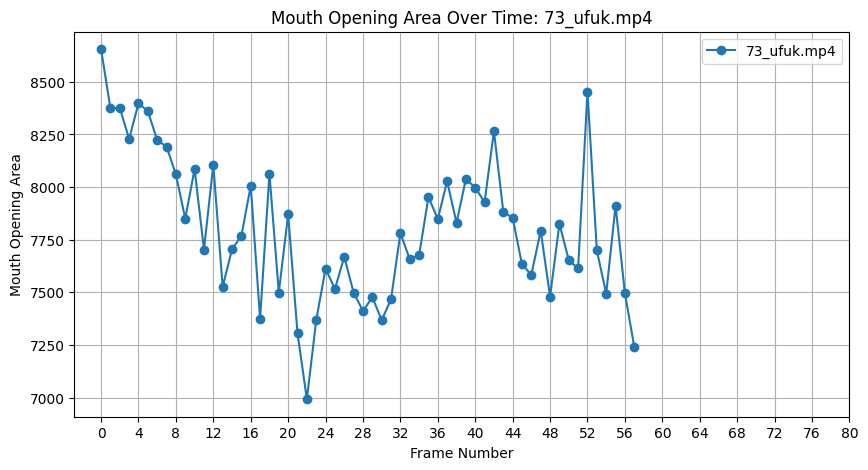

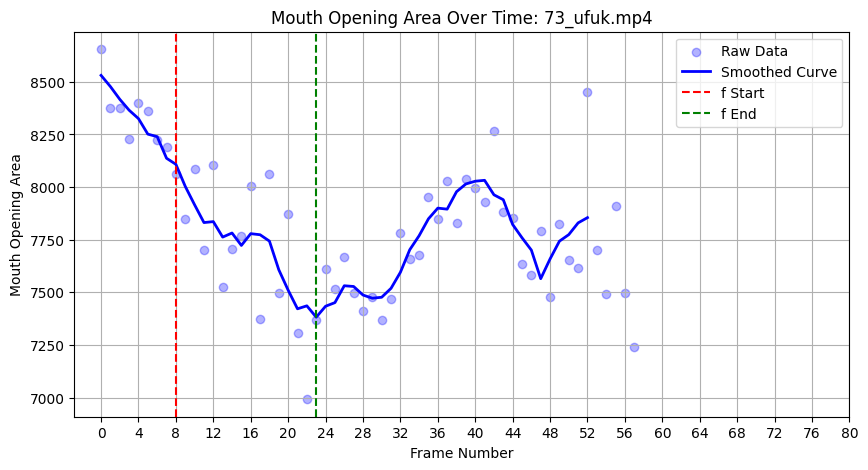

In [193]:
# Read the CSV file
df_from_csv = pd.read_csv("mouth_opening_area_from_npy.csv", index_col="Video Name")
# Example usage of plots
plot_histogram(df_from_csv, "Mouth Opening Area")
plot_aspect_ratio(df_from_csv, "73_ufuk.mp4", "Mouth Opening Area")
plot_aspect_ratio_smooth(df_from_csv, "73_ufuk.mp4", "parsed_textgrid_with_frames.json","Mouth Opening Area")

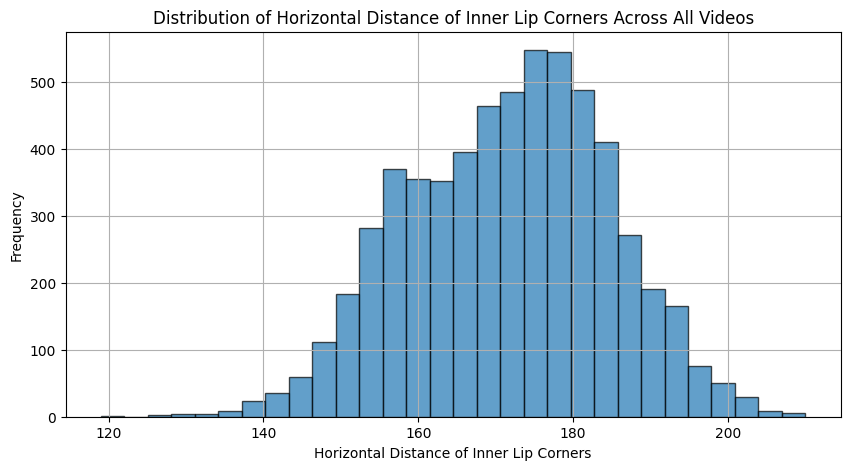

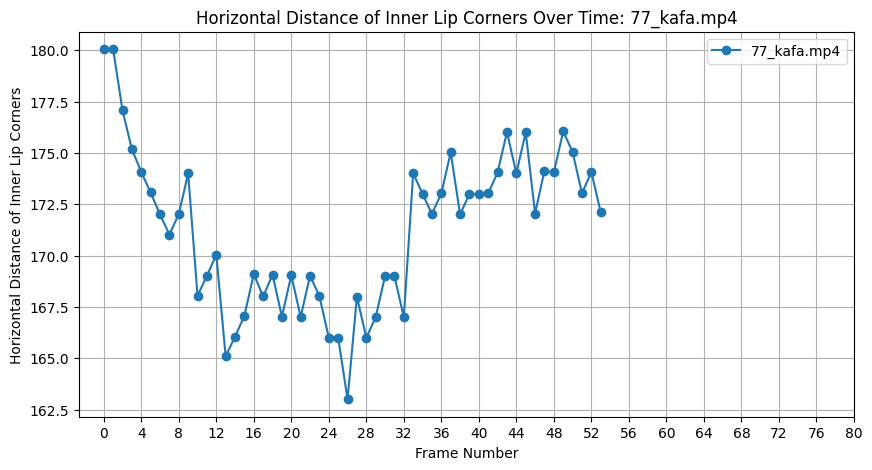

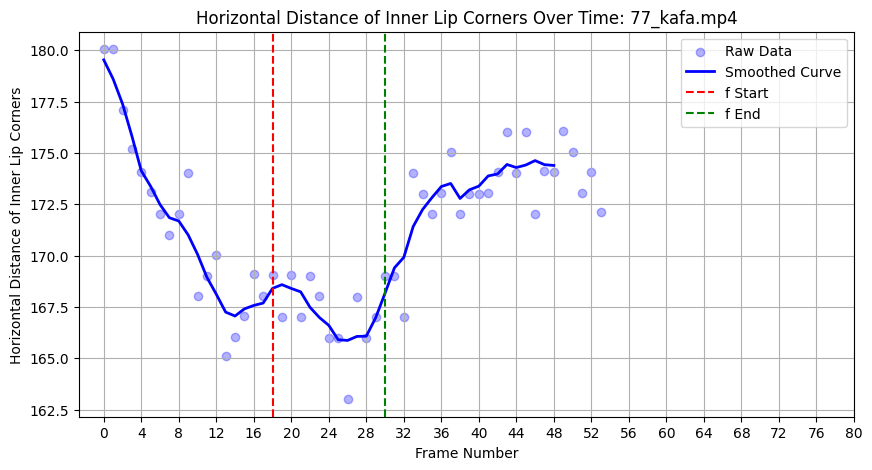

In [195]:
# Read the CSV file
df_from_csv = pd.read_csv("horizontal_distance_from_npy.csv", index_col="Video Name")
# Example usage of plots
plot_histogram(df_from_csv, "Horizontal Distance of Inner Lip Corners")
plot_aspect_ratio(df_from_csv, "77_kafa.mp4", "Horizontal Distance of Inner Lip Corners")
plot_aspect_ratio_smooth(df_from_csv, "77_kafa.mp4","parsed_textgrid_with_frames.json", "Horizontal Distance of Inner Lip Corners")

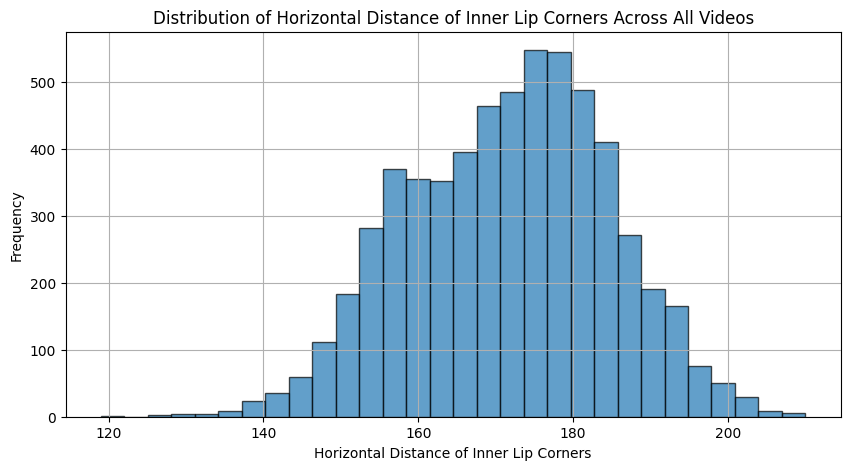

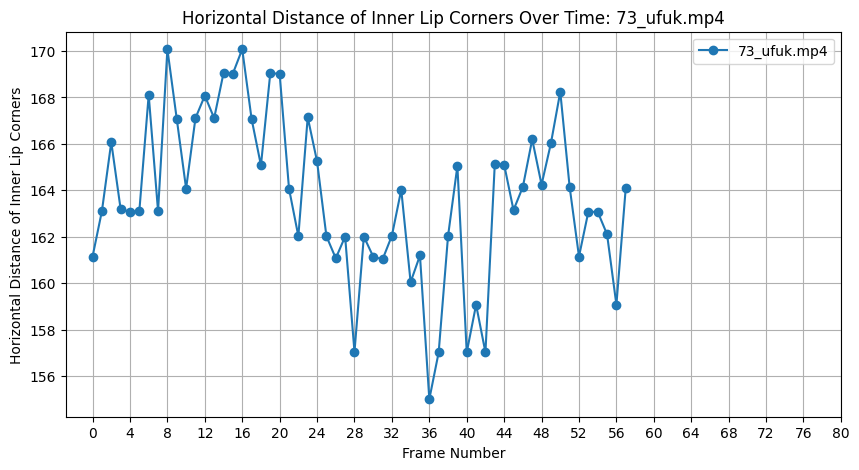

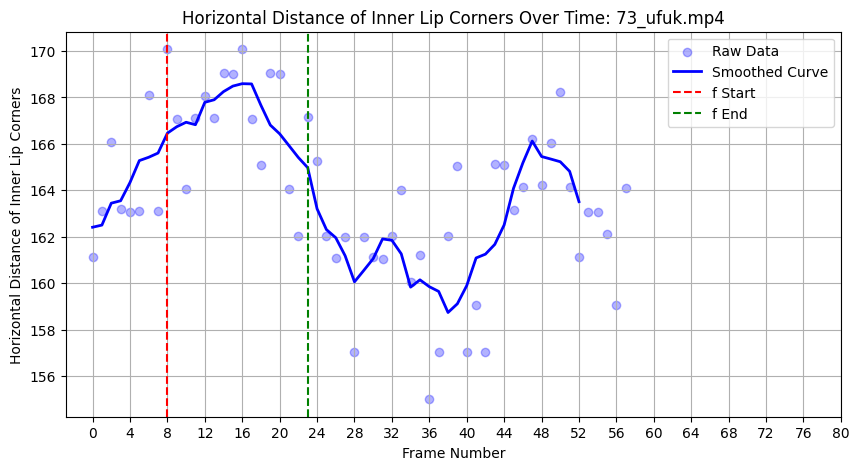

In [196]:
# Read the CSV file
df_from_csv = pd.read_csv("horizontal_distance_from_npy.csv", index_col="Video Name")
# Example usage of plots
plot_histogram(df_from_csv, "Horizontal Distance of Inner Lip Corners")
plot_aspect_ratio(df_from_csv, "73_ufuk.mp4", "Horizontal Distance of Inner Lip Corners")
plot_aspect_ratio_smooth(df_from_csv, "73_ufuk.mp4", "parsed_textgrid_with_frames.json","Horizontal Distance of Inner Lip Corners")

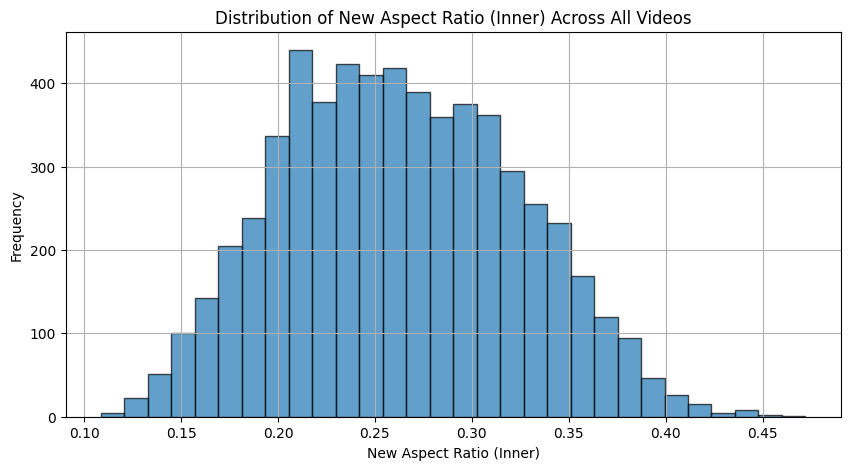

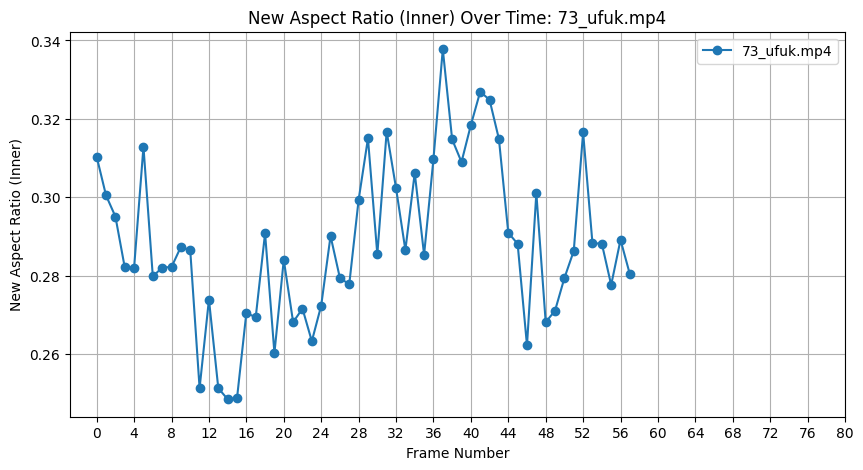

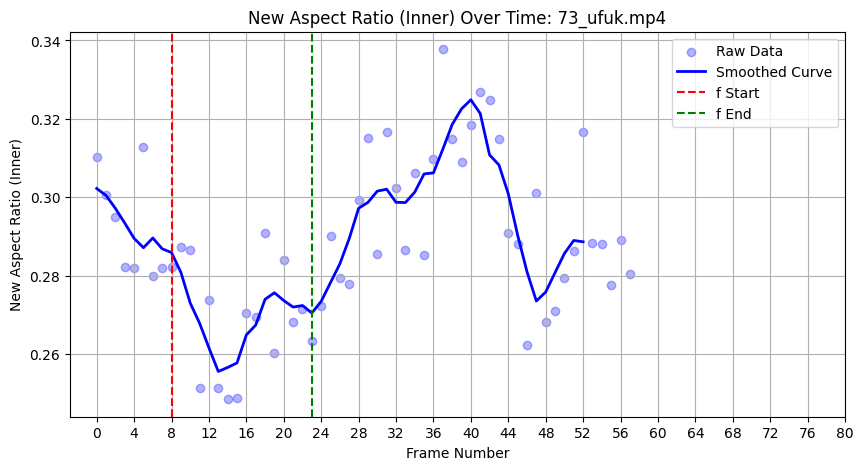

In [203]:

# Read the CSV file
df_from_csv = pd.read_csv("inner_lower_lip_vertical_horizontal_ratios_from_npy.csv", index_col="Video Name")
# Example usage of plots
plot_histogram(df_from_csv, "New Aspect Ratio (Inner)")
plot_aspect_ratio(df_from_csv, "73_ufuk.mp4", "New Aspect Ratio (Inner)")
plot_aspect_ratio_smooth(df_from_csv, "73_ufuk.mp4", "parsed_textgrid_with_frames.json","New Aspect Ratio (Inner)")

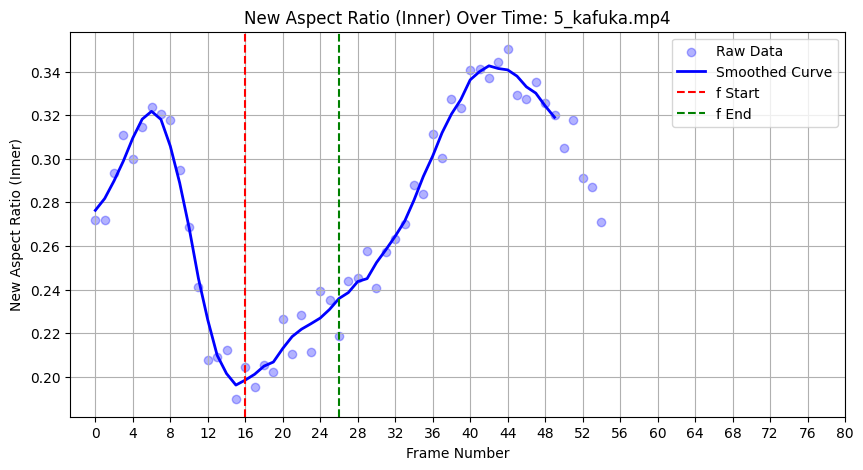

In [204]:
plot_aspect_ratio_smooth(df_from_csv, "5_kafuka.mp4", "parsed_textgrid_with_frames.json","New Aspect Ratio (Inner)")

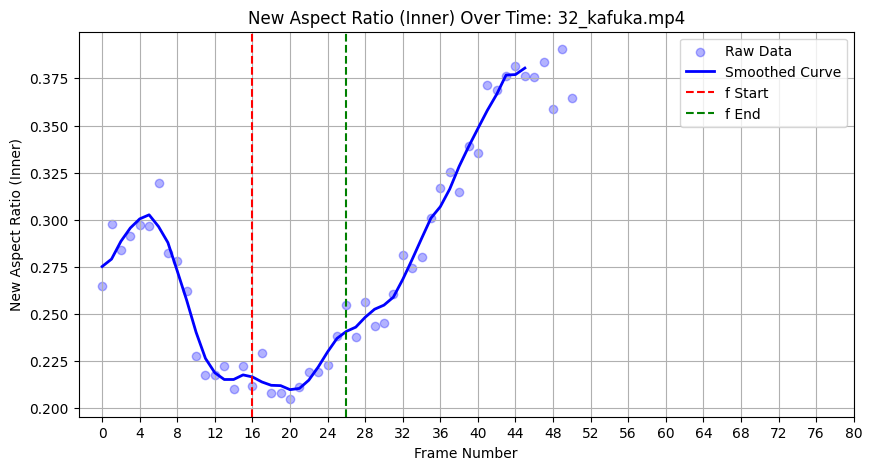

In [208]:
plot_aspect_ratio_smooth(df_from_csv, "32_kafuka.mp4", "parsed_textgrid_with_frames.json","New Aspect Ratio (Inner)")

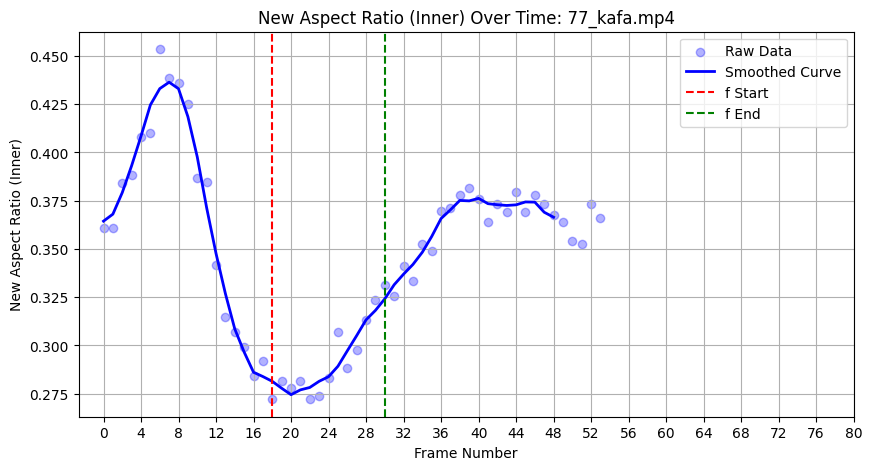

In [207]:
plot_aspect_ratio_smooth(df_from_csv, "77_kafa.mp4", "parsed_textgrid_with_frames.json","New Aspect Ratio (Inner)")

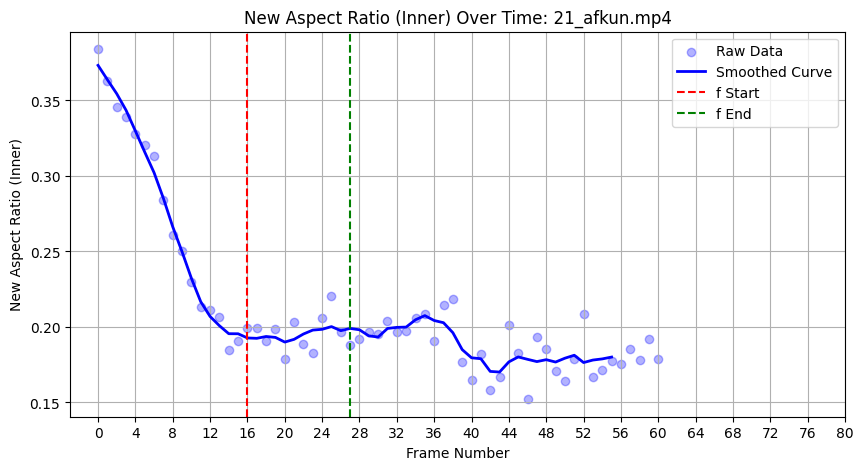

In [209]:
plot_aspect_ratio_smooth(df_from_csv, "21_afkun.mp4", "parsed_textgrid_with_frames.json","New Aspect Ratio (Inner)")

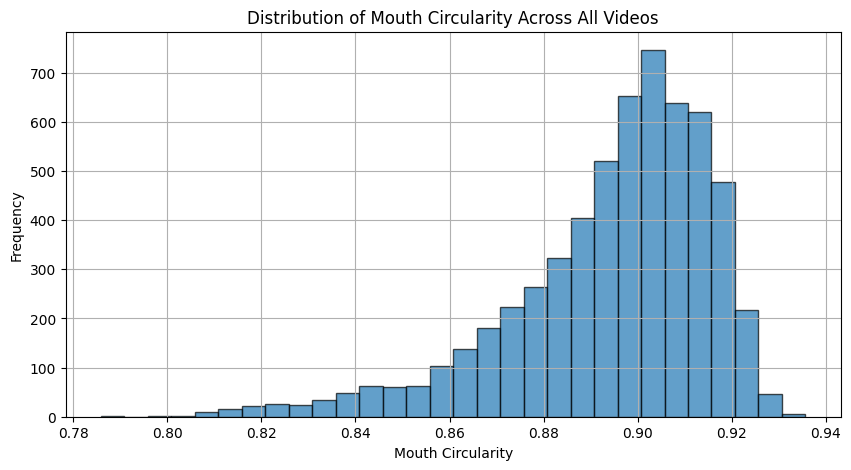

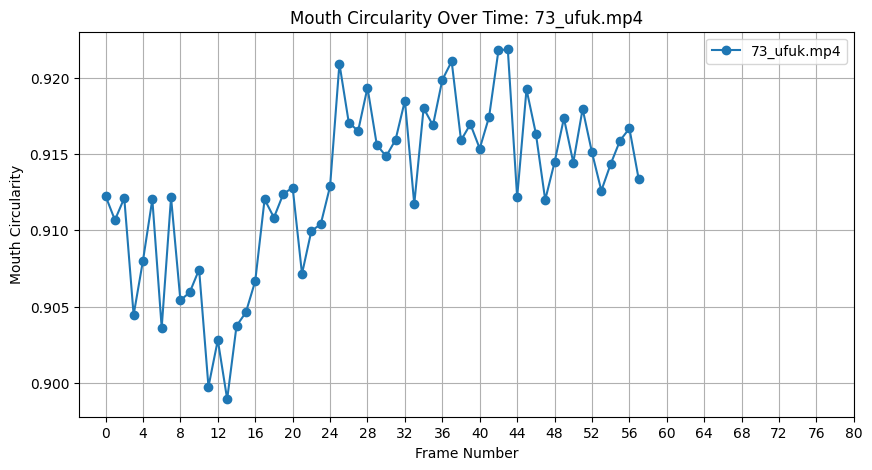

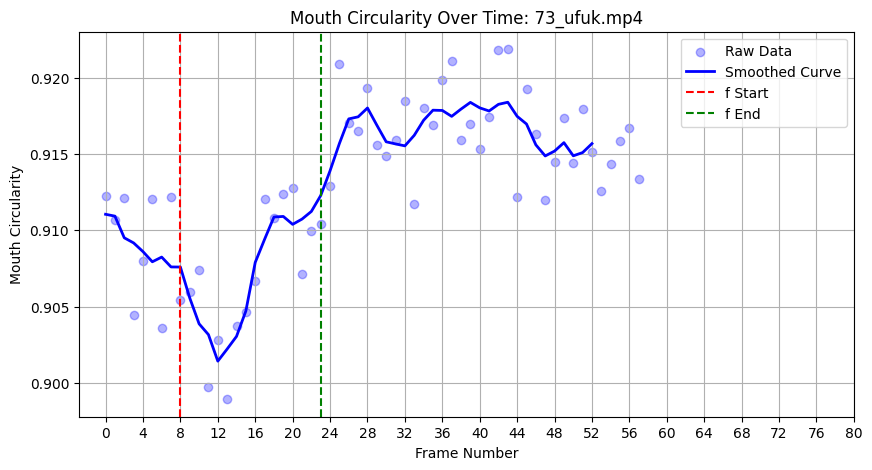

In [213]:


# Read the CSV file
df_from_csv = pd.read_csv("mouth_circularity_from_npy.csv", index_col="Video Name")
# Example usage of plots
plot_histogram(df_from_csv, "Mouth Circularity")
plot_aspect_ratio(df_from_csv, "73_ufuk.mp4", "Mouth Circularity")
plot_aspect_ratio_smooth(df_from_csv, "73_ufuk.mp4", "parsed_textgrid_with_frames.json","Mouth Circularity")

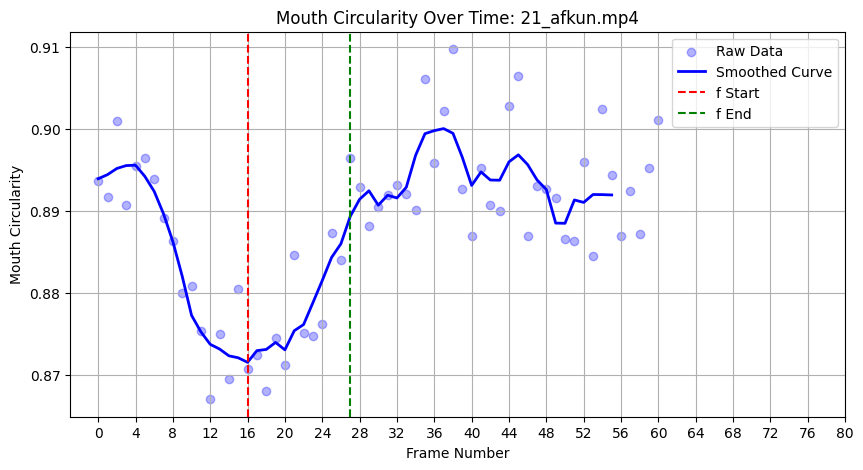

In [214]:
plot_aspect_ratio_smooth(df_from_csv, "21_afkun.mp4", "parsed_textgrid_with_frames.json","Mouth Circularity")

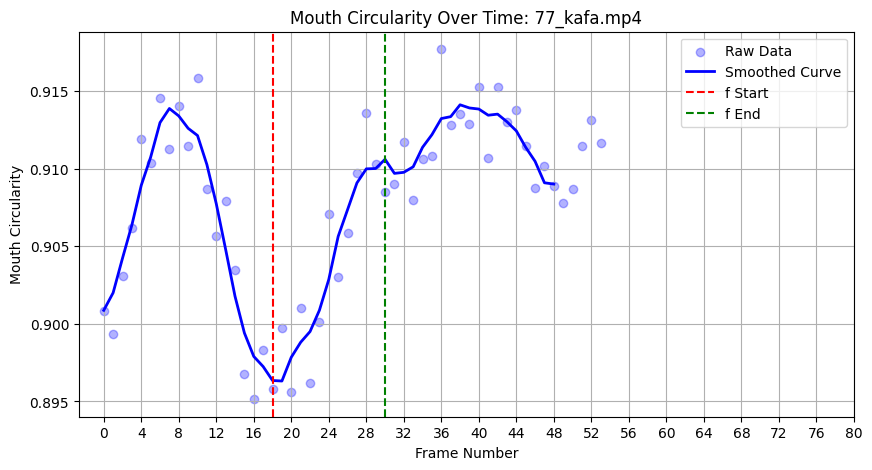

In [215]:
plot_aspect_ratio_smooth(df_from_csv, "77_kafa.mp4", "parsed_textgrid_with_frames.json","Mouth Circularity")

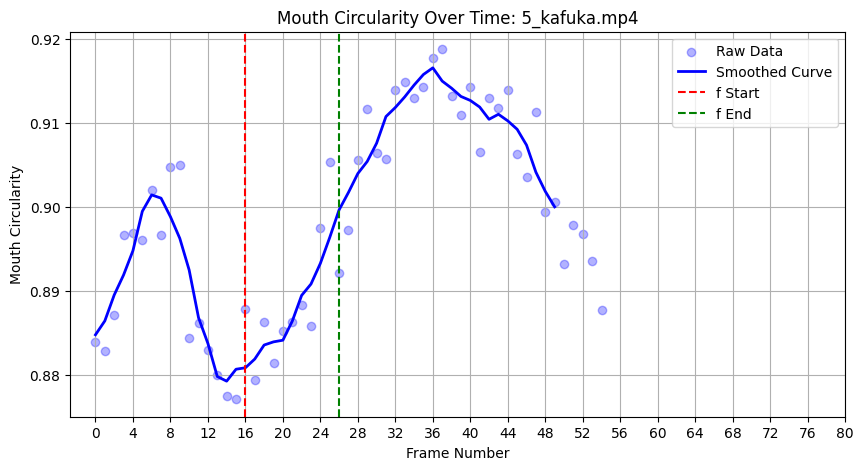

In [216]:
plot_aspect_ratio_smooth(df_from_csv, "5_kafuka.mp4", "parsed_textgrid_with_frames.json","Mouth Circularity")

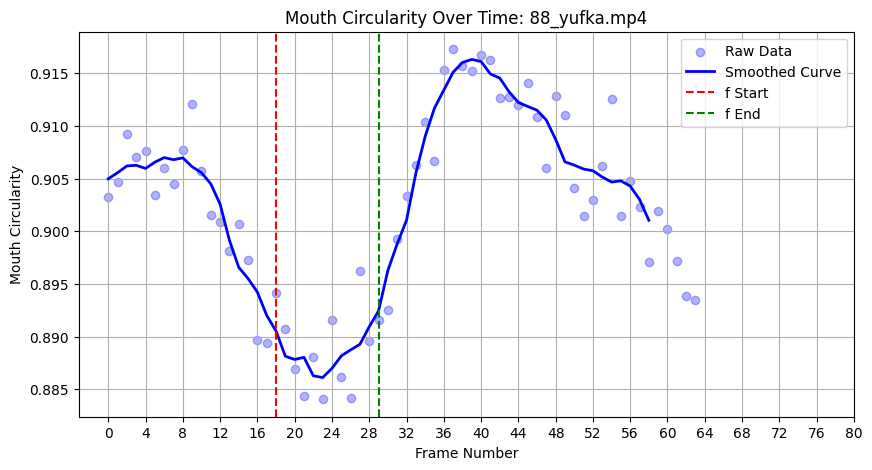

In [217]:
plot_aspect_ratio_smooth(df_from_csv, "88_yufka.mp4", "parsed_textgrid_with_frames.json","Mouth Circularity")

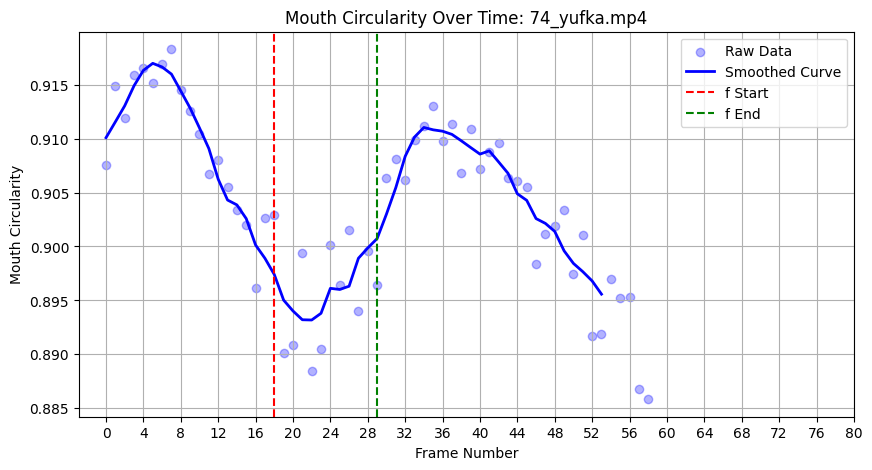

In [218]:
plot_aspect_ratio_smooth(df_from_csv, "74_yufka.mp4", "parsed_textgrid_with_frames.json","Mouth Circularity")

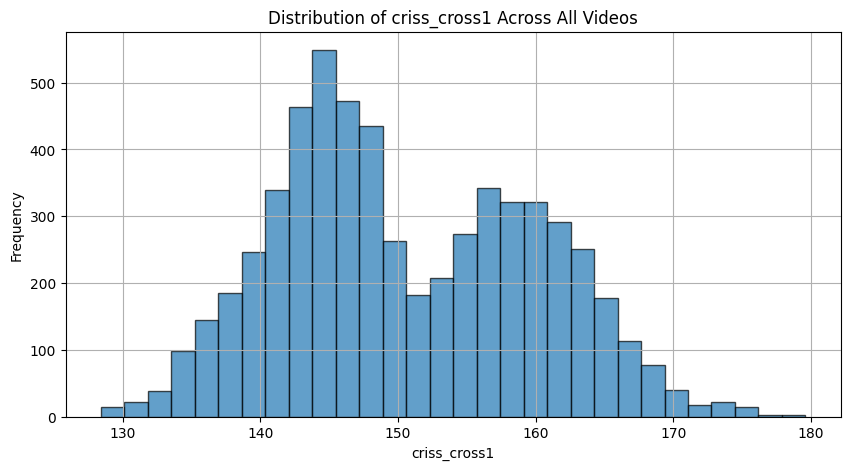

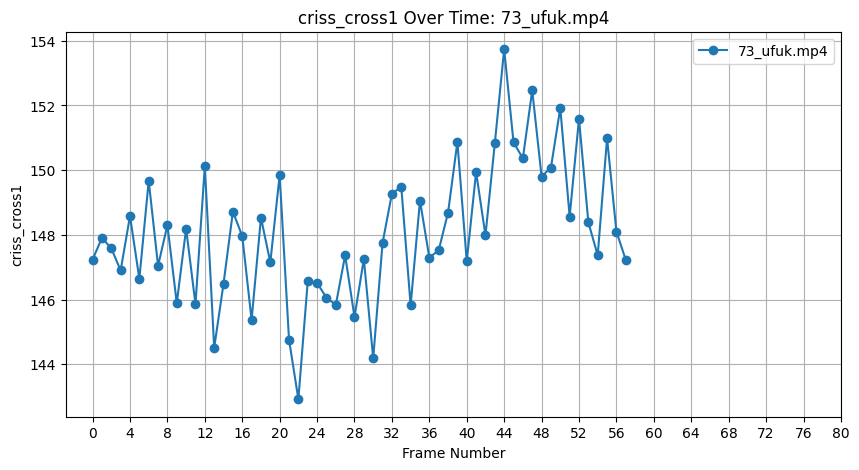

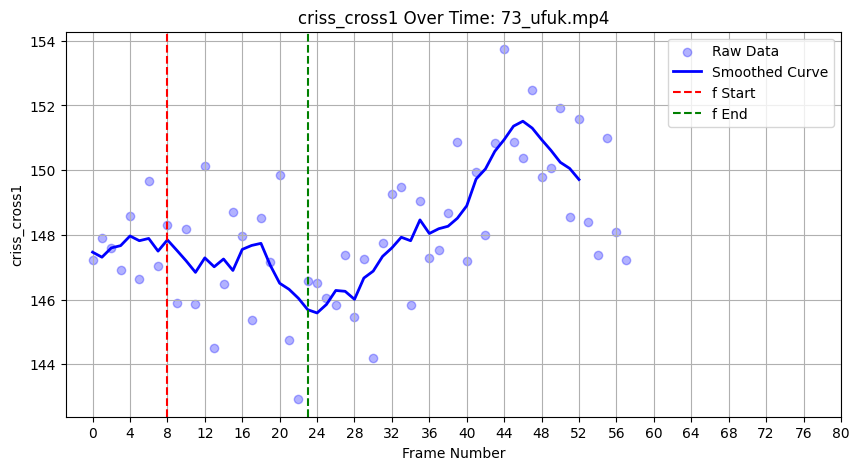

In [225]:
# Read the CSV file
df_from_csv = pd.read_csv("criss_cross1_from_npy.csv", index_col="Video Name")
# Example usage of plots
plot_histogram(df_from_csv, "criss_cross1")
plot_aspect_ratio(df_from_csv, "73_ufuk.mp4", "criss_cross1")
plot_aspect_ratio_smooth(df_from_csv, "73_ufuk.mp4", "parsed_textgrid_with_frames.json","criss_cross1")

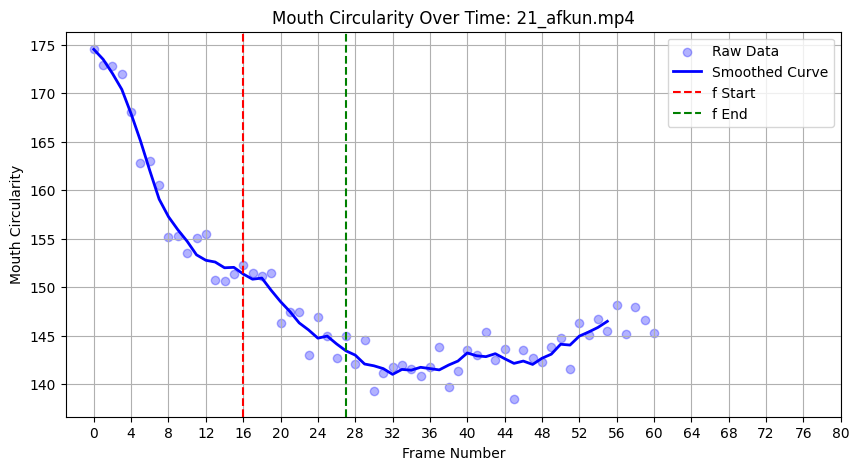

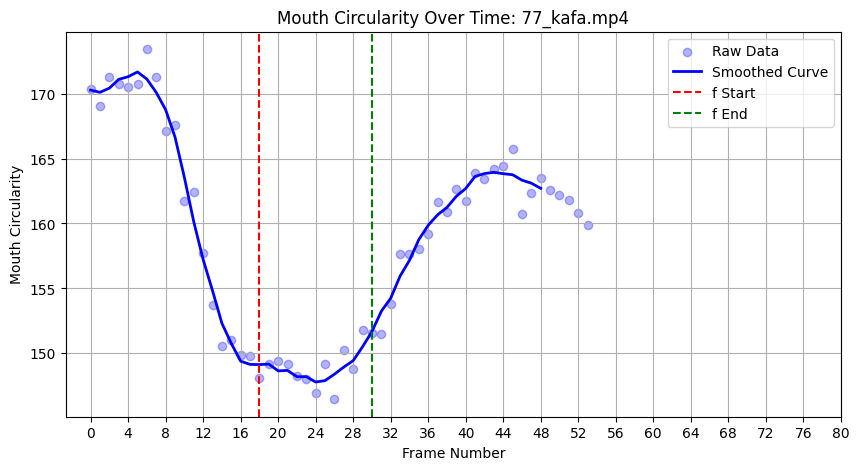

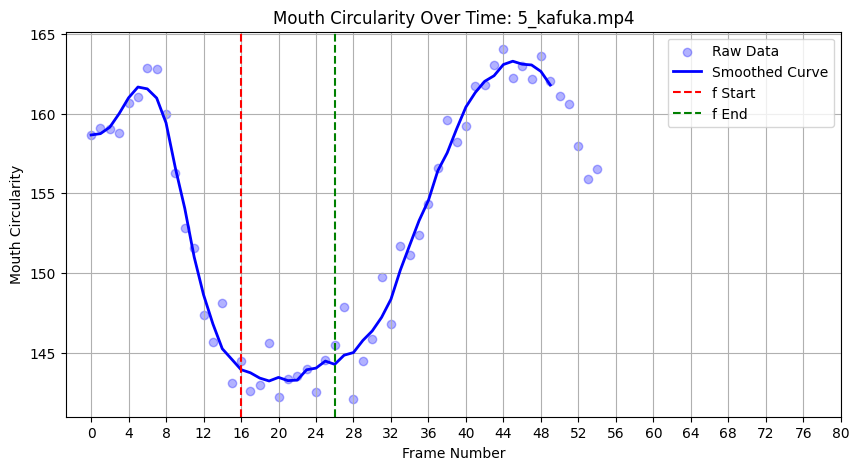

In [226]:
plot_aspect_ratio_smooth(df_from_csv, "21_afkun.mp4", "parsed_textgrid_with_frames.json","criss_cross1")

plot_aspect_ratio_smooth(df_from_csv, "77_kafa.mp4", "parsed_textgrid_with_frames.json","criss_cross1")

plot_aspect_ratio_smooth(df_from_csv, "5_kafuka.mp4", "parsed_textgrid_with_frames.json","criss_cross1")

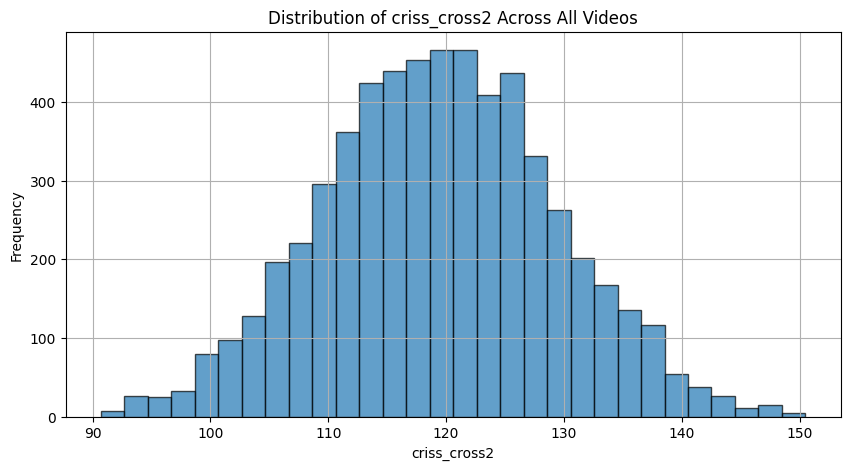

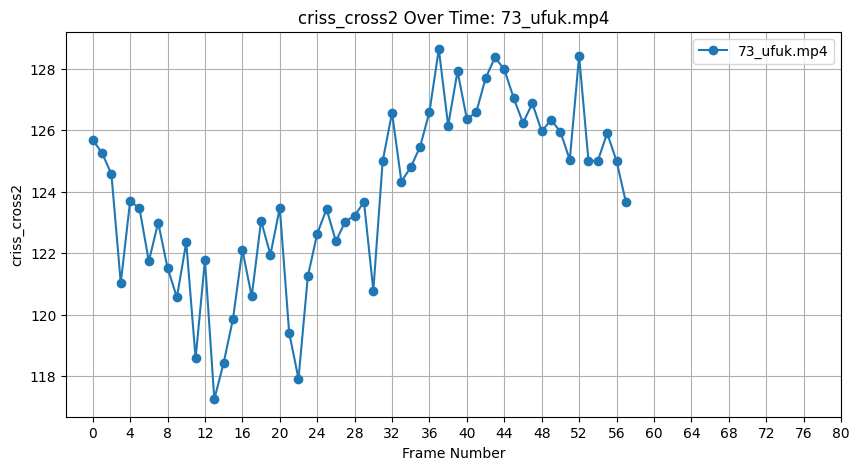

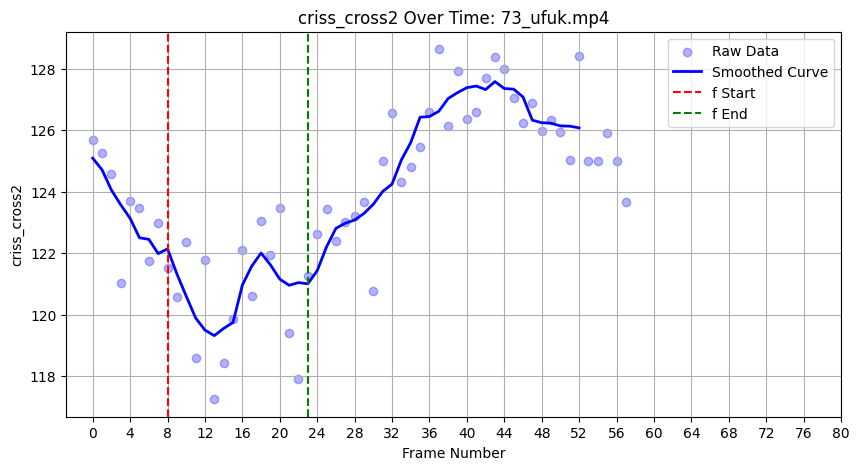

In [227]:
# Read the CSV file
df_from_csv = pd.read_csv("criss_cross2_from_npy.csv", index_col="Video Name")
# Example usage of plots
plot_histogram(df_from_csv, "criss_cross2")
plot_aspect_ratio(df_from_csv, "73_ufuk.mp4", "criss_cross2")
plot_aspect_ratio_smooth(df_from_csv, "73_ufuk.mp4", "parsed_textgrid_with_frames.json","criss_cross2")

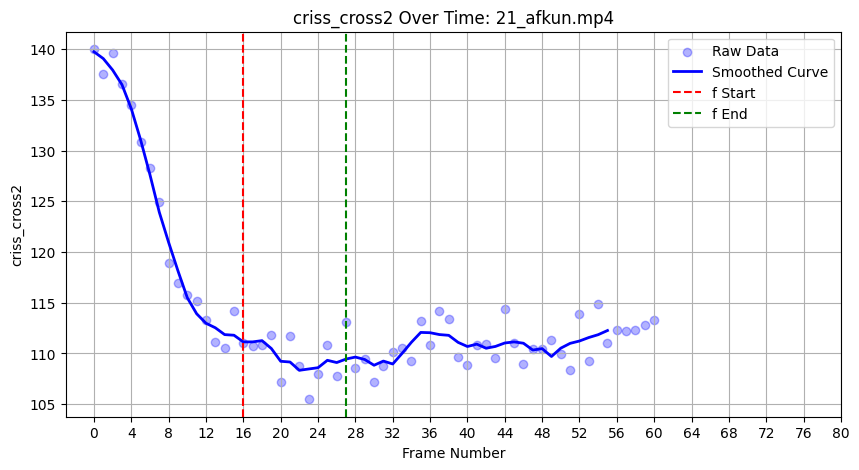

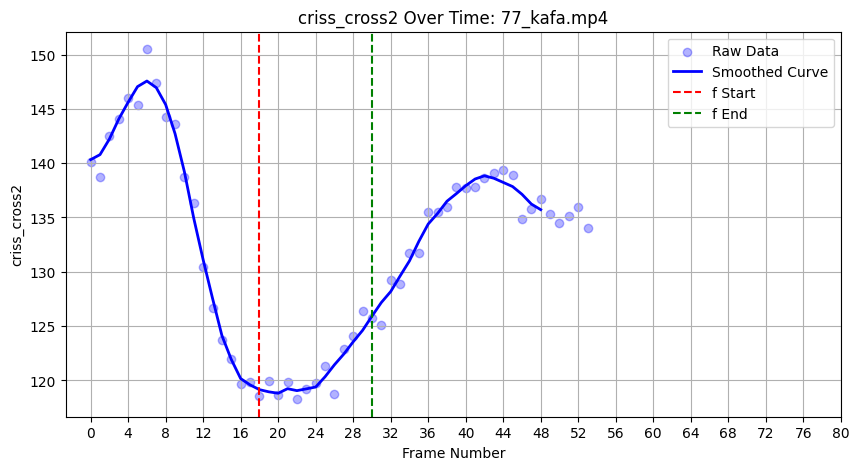

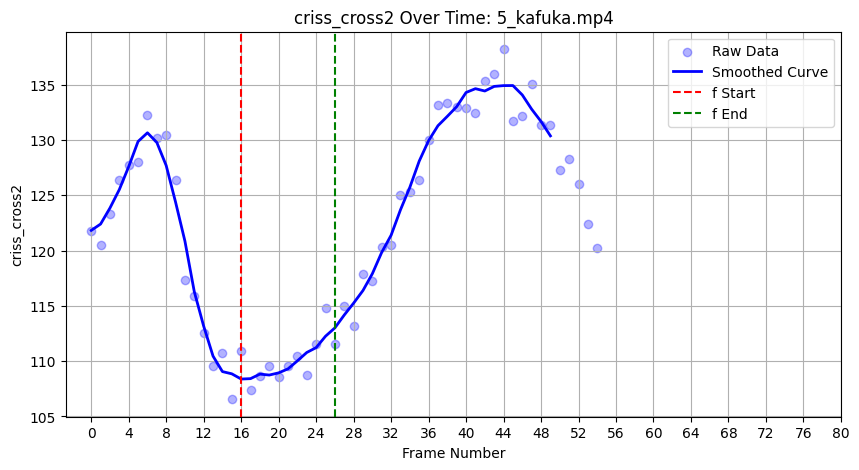

In [228]:
plot_aspect_ratio_smooth(df_from_csv, "21_afkun.mp4", "parsed_textgrid_with_frames.json","criss_cross2")

plot_aspect_ratio_smooth(df_from_csv, "77_kafa.mp4", "parsed_textgrid_with_frames.json","criss_cross2")

plot_aspect_ratio_smooth(df_from_csv, "5_kafuka.mp4", "parsed_textgrid_with_frames.json","criss_cross2")

In [ ]:
# Read the CSV file
df_from_csv = pd.read_csv("criss_cross2_from_npy.csv", index_col="Video Name")
# Example usage of plots
plot_histogram(df_from_csv, "criss_cross2")
plot_aspect_ratio(df_from_csv, "73_ufuk.mp4", "criss_cross2")
plot_aspect_ratio_smooth(df_from_csv, "73_ufuk.mp4", "parsed_textgrid_with_frames.json","criss_cross2")

In [248]:
# Function to plot multiple words on the same plot for comparison with aligned starting frames
def plot_comparison_aligned(df, video_names, json_file, score_name="Mouth Circularity", apply_smoothing=True):
    plt.figure(figsize=(12, 6))
    colors = ['blue', 'red', 'green', 'purple', 'orange', 'pink', 'yellow']  # Different colors for each word

    with open(json_file, 'r', encoding='utf-16') as f:
        parsed_data = json.load(f)

    min_L_frame_start = min(value['L_frame_start'] for value in parsed_data.values() if 'L_frame_start' in value)

    for i, video_name in enumerate(video_names):
        if video_name in df.index:
            raw_values = df.loc[video_name].astype(float)

            # Find matching dictionary entry in JSON
            for key, value in parsed_data.items():
                if video_name.split("_")[1].split(".")[0] == value['word']:
                    L_frame_start = value['L_frame_start']
                    L_frame_end = value['L_frame_end']

                    aligned_frame_numbers = np.arange(len(raw_values)) - (L_frame_start - min_L_frame_start)

                    plt.scatter(aligned_frame_numbers, raw_values, alpha=0.3, color=colors[i % len(colors)], label=f"{video_name} Raw Data")

                    if apply_smoothing:
                        smoothed_values = savgol_filter(raw_values, window_length=min(11, len(raw_values)), polyorder=2, mode='nearest')
                        plt.plot(aligned_frame_numbers, smoothed_values, color=colors[i % len(colors)], linewidth=2, label=f"{video_name} Smoothed")

                    plt.axvline(x=min_L_frame_start, color=colors[i % len(colors)], linestyle='--', alpha=0.5, label=f"{video_name} L Start")
                    plt.axvline(x=min_L_frame_start + (L_frame_end - L_frame_start), color=colors[i % len(colors)], linestyle='--', alpha=0.5)
                    break

    plt.xlabel("Aligned Frame Number")
    plt.ylabel(score_name)
    plt.title(f"Comparison of {score_name} Across Words (Aligned by 'f' Letter Start)")
    plt.legend()
    plt.grid()
    plt.show()

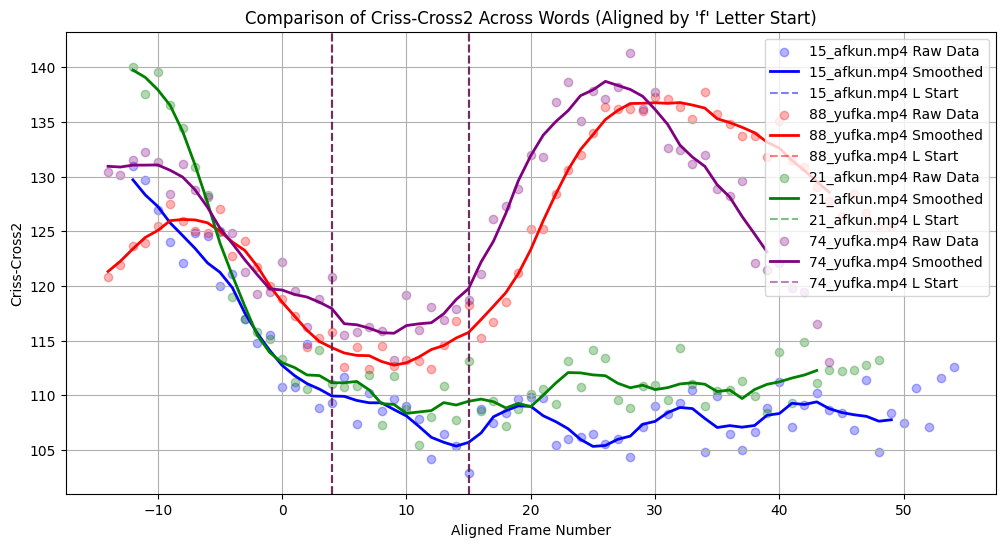

In [250]:
video_list = ["15_afkun.mp4", "88_yufka.mp4", "21_afkun.mp4", "74_yufka.mp4"]  # "73_ufuk.mp4", "21_afkun.mp4", "77_kafa.mp4", "5_kafuka.mp4", "74_yufka.mp4"
plot_comparison_aligned(df_from_csv, video_list, "parsed_textgrid_with_frames.json", "Criss-Cross2")


In [260]:
# Read the CSV file
df_from_csv = pd.read_csv("criss_cross1_from_npy.csv", index_col="Video Name")

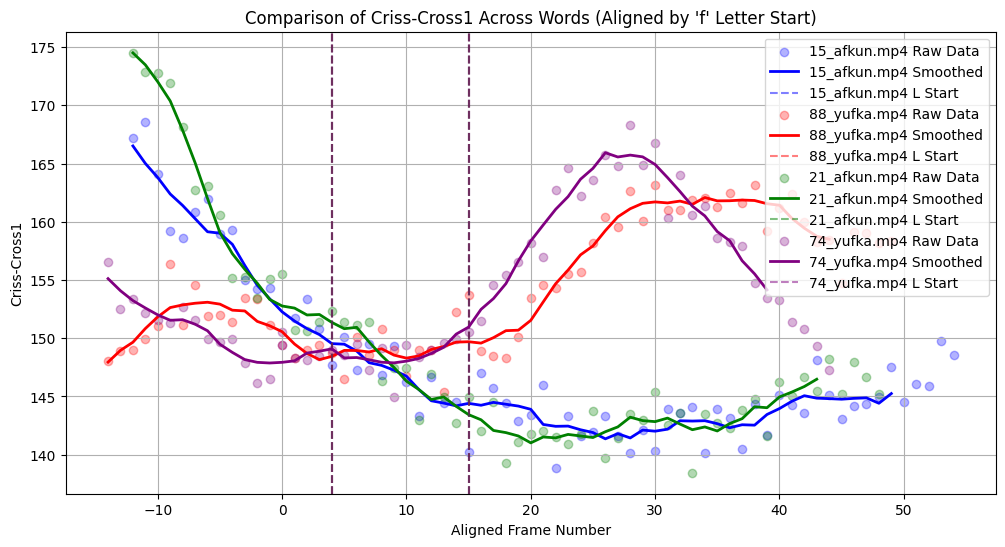

In [252]:
video_list = ["15_afkun.mp4", "88_yufka.mp4", "21_afkun.mp4", "74_yufka.mp4"]  # "73_ufuk.mp4", "21_afkun.mp4", "77_kafa.mp4", "5_kafuka.mp4", "74_yufka.mp4"
plot_comparison_aligned(df_from_csv, video_list, "parsed_textgrid_with_frames.json", "Criss-Cross1")


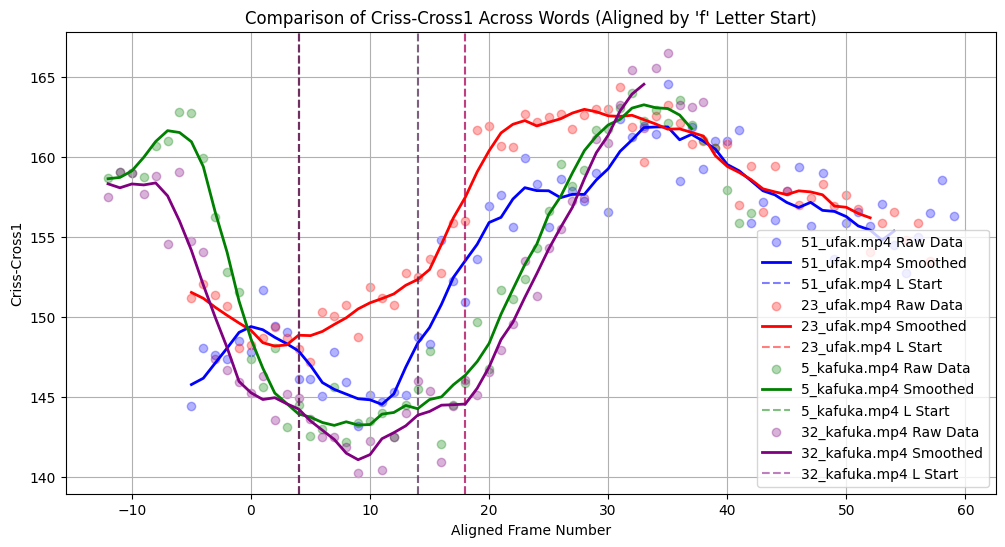

In [257]:
video_list = ["51_ufak.mp4", "23_ufak.mp4", "5_kafuka.mp4", "32_kafuka.mp4"]  # "73_ufuk.mp4", "21_afkun.mp4", "77_kafa.mp4", "5_kafuka.mp4", "74_yufka.mp4"
plot_comparison_aligned(df_from_csv, video_list, "parsed_textgrid_with_frames.json", "Criss-Cross1")


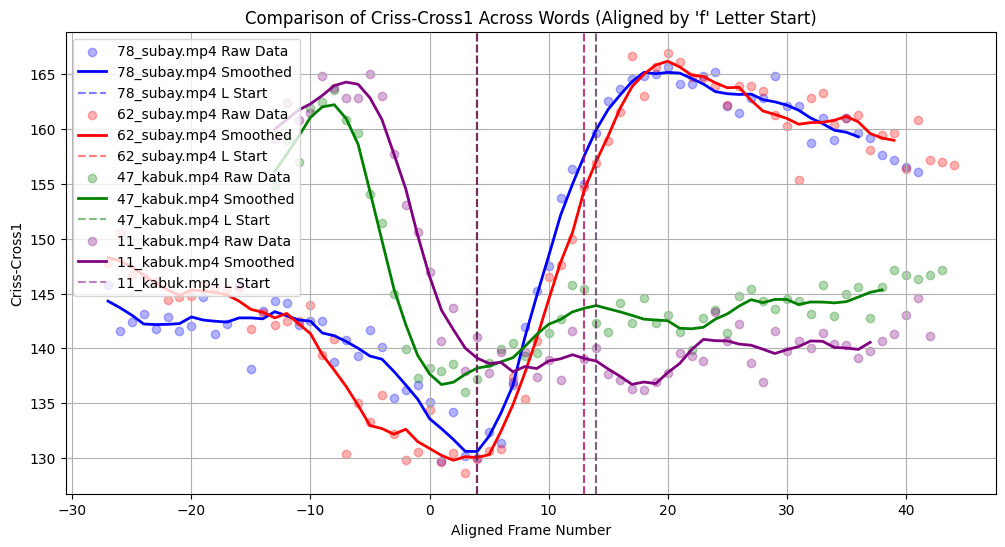

In [261]:
video_list = ["78_subay.mp4", "62_subay.mp4", "47_kabuk.mp4", "11_kabuk.mp4"]  # "73_ufuk.mp4", "21_afkun.mp4", "77_kafa.mp4", "5_kafuka.mp4", "74_yufka.mp4"
plot_comparison_aligned(df_from_csv, video_list, "parsed_textgrid_with_frames.json", "Criss-Cross1")


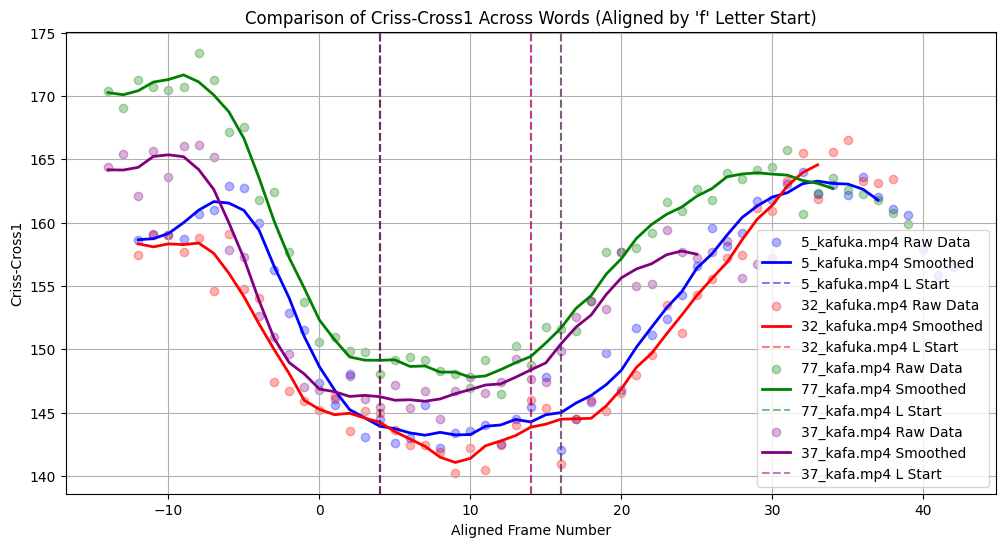

In [253]:
video_list = ["5_kafuka.mp4", "32_kafuka.mp4", "77_kafa.mp4", "37_kafa.mp4"]  # "73_ufuk.mp4", "21_afkun.mp4", "77_kafa.mp4", "5_kafuka.mp4", "74_yufka.mp4"
plot_comparison_aligned(df_from_csv, video_list, "parsed_textgrid_with_frames.json", "Criss-Cross1")


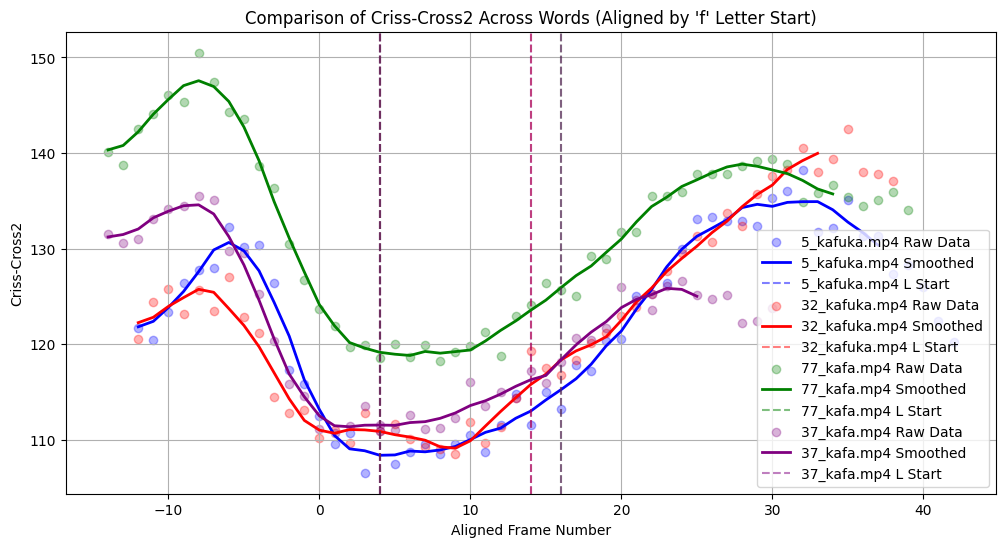

In [258]:
# Read the CSV file
df_from_csv = pd.read_csv("criss_cross2_from_npy.csv", index_col="Video Name")
video_list = ["5_kafuka.mp4", "32_kafuka.mp4", "77_kafa.mp4", "37_kafa.mp4"]  # "73_ufuk.mp4", "21_afkun.mp4", "77_kafa.mp4", "5_kafuka.mp4", "74_yufka.mp4"
plot_comparison_aligned(df_from_csv, video_list, "parsed_textgrid_with_frames.json", "Criss-Cross2")


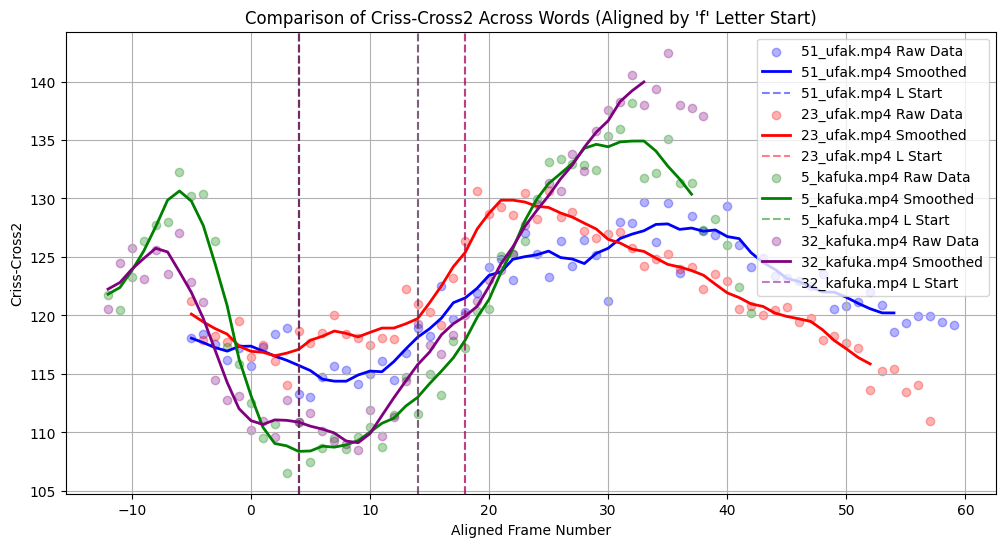

In [259]:
video_list = ["51_ufak.mp4", "23_ufak.mp4", "5_kafuka.mp4", "32_kafuka.mp4"]  # "73_ufuk.mp4", "21_afkun.mp4", "77_kafa.mp4", "5_kafuka.mp4", "74_yufka.mp4"
plot_comparison_aligned(df_from_csv, video_list, "parsed_textgrid_with_frames.json", "Criss-Cross2")


# Old Code

In [ ]:
import cv2
import dlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Comment above if you do not wish to use google drive to access the video or images.

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = "./drive/MyDrive"  # if the data uploaded to the google drive.

In [ ]:
video_path = os.path.join(DATA_PATH, "kukbu.mp4")  # kukbu nagi_new.MP4 # I suggest using your google drive.
# Uncomment below and comment above if you upload your video to colab directory instead of pulling the video from google drive.
# video_path = "TavukYavas.mp4"

In [ ]:
nags_word_videos_folder = "./drive/MyDrive/nags_word_videos"

In [ ]:
# Get a list of all video files in the folder
video_files = [f for f in os.listdir(nags_word_videos_folder) if f.endswith(('.mp4', '.avi', '.mov'))]

video_files[0][:-4]

'0_kukbu'

In [ ]:
# Creates the frames as .jpg files and put them into the output_folder parameter named folder.
# Be aware! When you use the function, Don't use it with another video blatantly.
# I have not yet developed it for such cases.

def video_to_frames(video_path, output_folder):

    # Check if the output folder exists, if not, create it
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    cap = cv2.VideoCapture(video_path)
    count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_path = f"{output_folder}/frame_{count}.jpg"
        cv2.imwrite(frame_path, frame)
        count += 1
    cap.release()

In [ ]:
# Example usage
video_to_frames(video_path, 'frames_output')

In [ ]:
# Example usage
video_to_frames(nags_word_videos_folder +"/" +  video_files[0], 'frames_output_' + video_files[0][:-4])

In [ ]:
import os
import cv2

def video_to_frames2(video_path, output_folder, target_fps=None):
    """
    Extracts frames from a video and saves them as .jpg files.

    Parameters:
        video_path (str): Path to the input video.
        output_folder (str): Path to the folder where frames will be saved.
        target_fps (float, optional): Target FPS for extracting frames. If None, extracts all frames.
    """
    # Check if the output folder exists, if not, create it
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    cap = cv2.VideoCapture(video_path)
    original_fps = cap.get(cv2.CAP_PROP_FPS)  # Original FPS of the video
    frame_interval = int(original_fps / target_fps) if target_fps else 1

    count = 0
    saved_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        # Save only frames that match the interval
        if count % frame_interval == 0:
            frame_path = f"{output_folder}/frame_{saved_count}.jpg"
            cv2.imwrite(frame_path, frame)
            saved_count += 1
        count += 1

    cap.release()
    print(f"Extracted {saved_count} frames from the video.")

# Example usage
#video_to_frames2(video_path, 'frames_output60', target_fps=59.94)  # for the curious, check the color tv causing 60000/1001 frame rate.


In [ ]:
video_to_frames2(nags_word_videos_folder +"/" +  video_files[0], 'frames_output_' + video_files[0][:-4], target_fps=59.94)

Extracted 108 frames from the video.


In [ ]:
cap = cv2.VideoCapture(video_path)
original_fps = cap.get(cv2.CAP_PROP_FPS)  # Original FPS of the video

In [ ]:
original_fps

59.94005994005994

In [ ]:
# I have the pretrained model in my drive
# So either you get it and upload it to your drive, or wait for another patch from me.

pretrained_model_path = os.path.join(DATA_PATH, "shape_predictor_68_face_landmarks.dat")

In [ ]:
# you can put the image to the same directory with the code.
# image_path = "frame_0.jpg"  # if the image is in the directory.

# Or you might use the video to frame feature.
image_path = "frames_output_0_kukbu/frame_0.jpg"  # if the image is created from the video.


In [ ]:
# Load pre-trained facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(pretrained_model_path)

def detect_face(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)

        face_points = []
        for n in range(68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            face_points.append((x, y))

        return face_points

# Example usage
image = cv2.imread(image_path)
face_landmarks = detect_face(image)


In [ ]:
# Load pre-trained facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(pretrained_model_path)

def detect_lips(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)

        # Lip landmarks are indexed from 48 to 67 (68-point model)
        lip_points = []
        for n in range(48,68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            lip_points.append((x, y))

        return lip_points

# Example usage
image = cv2.imread(image_path)
#image = cv2.imread('frames_output/frame_0.jpg')
lip_landmarks = detect_lips(image)


In [ ]:
# Load pre-trained facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(pretrained_model_path)

def detect_outer_lips(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)

        # Lip landmarks are indexed from 48 to 59 (68-point model)
        lip_points = []
        for n in range(48,60):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            lip_points.append((x, y))

        return lip_points

# Example usage
image = cv2.imread(image_path)
#image = cv2.imread('frames_output/frame_0.jpg')
outer_lip_landmarks = detect_outer_lips(image)


In [ ]:
# Crops the face from the image using the face_landmarks you get from the functions above.
# And creates a jpg image in the directory. So that you can download it and check out the image.
# I will make a patch for testing purposes for videos. It will omit inefficiencies like this.
def crop_face(image, face_landmarks):
    # Get bounding box for the lips
    x_min = min([point[0] for point in face_landmarks])
    y_min = min([point[1] for point in face_landmarks])
    x_max = max([point[0] for point in face_landmarks])
    y_max = max([point[1] for point in face_landmarks])

    # Crop the face region
    face_region = image[y_min:y_max, x_min:x_max]
    return face_region

# Example usage
face_region = crop_face(image, face_landmarks)
cv2.imwrite('face_region.jpg', face_region)

True

In [ ]:
def crop_lips(image, lip_landmarks):
    # Get bounding box for the lips
    x_min = min([point[0] for point in lip_landmarks])
    y_min = min([point[1] for point in lip_landmarks])
    x_max = max([point[0] for point in lip_landmarks])
    y_max = max([point[1] for point in lip_landmarks])

    # Crop the lip region
    lip_region = image[y_min:y_max, x_min:x_max]
    return lip_region

# Example usage
lip_region = crop_lips(image, lip_landmarks)
cv2.imwrite('lip_region.jpg', lip_region)

True

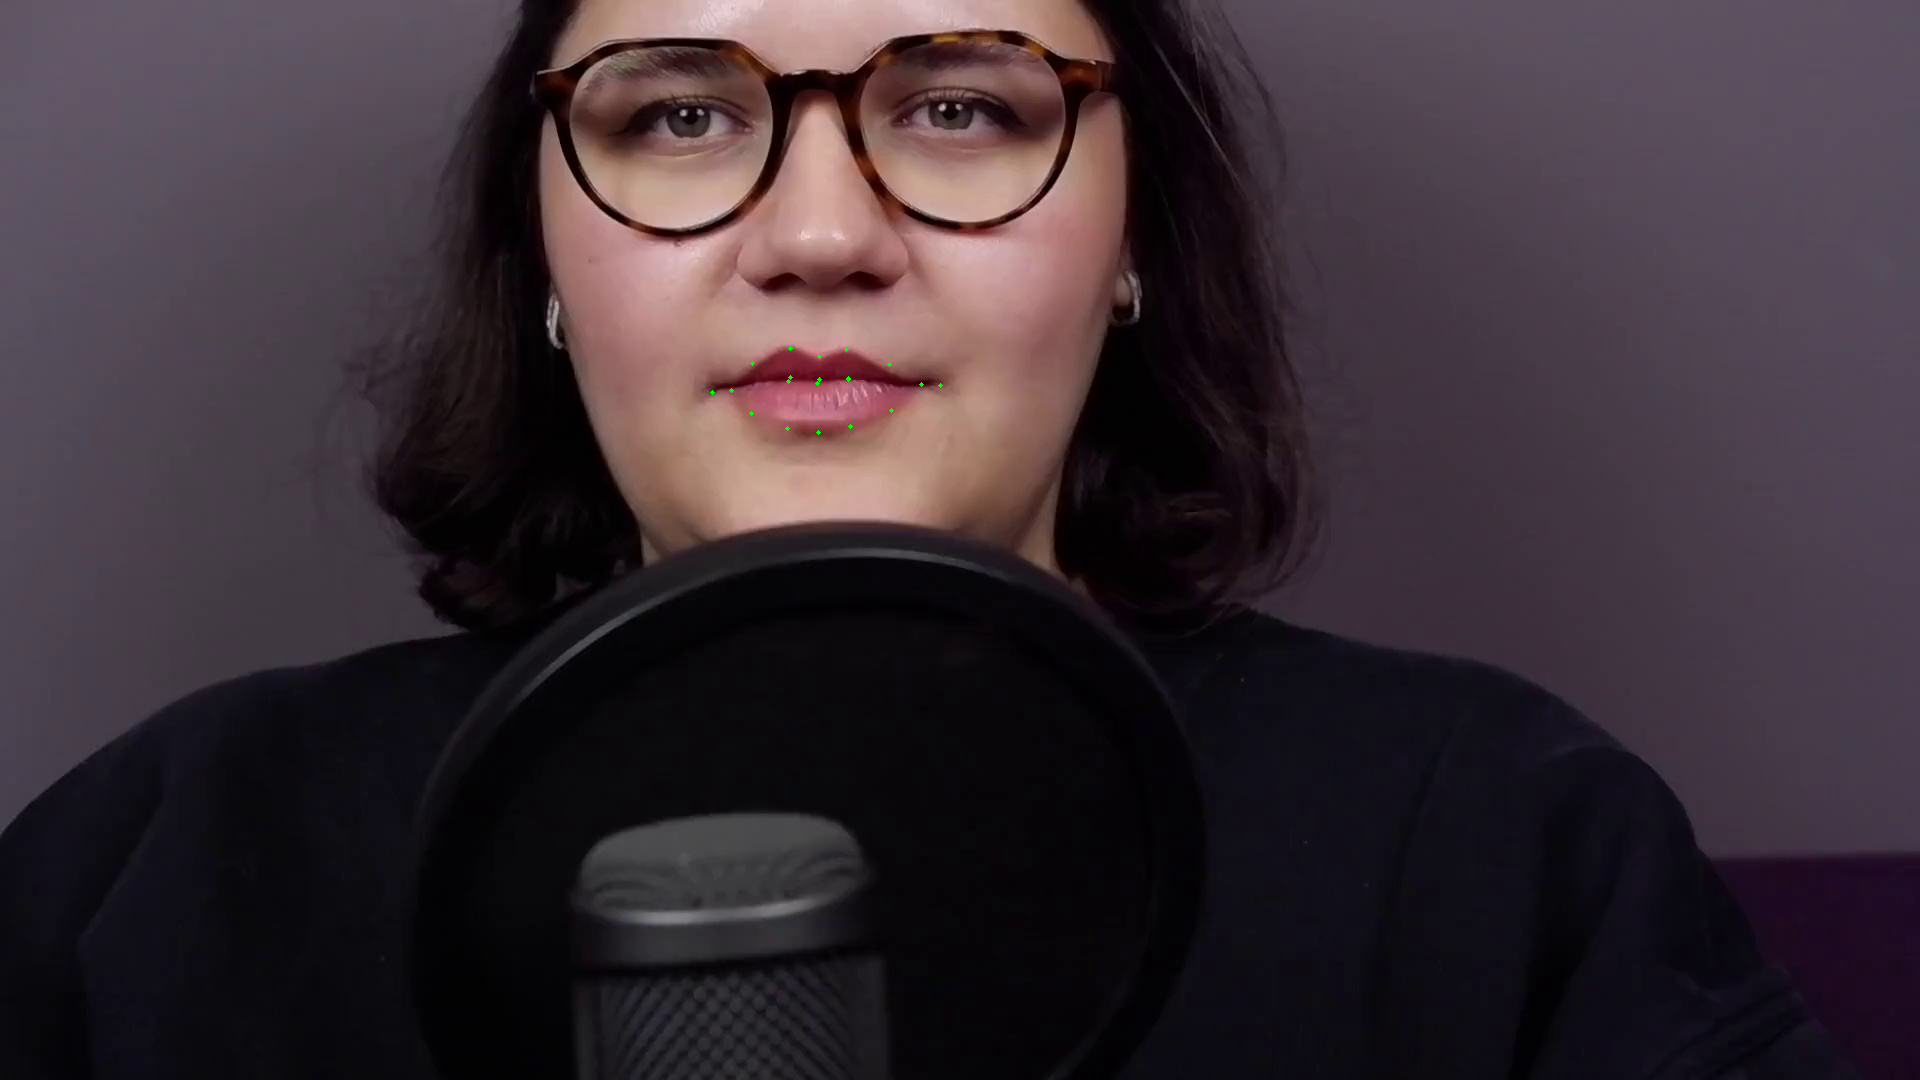

In [ ]:
from google.colab.patches import cv2_imshow  # Import this for image display in Colab

# Load pre-trained facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(pretrained_model_path)  # Ensure this is the correct path

def detect_lips_landmarks(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)

        # Create a list to store the lip landmarks
        lip_points = []
        for n in range(48,68):  # You are now extracting all 68 points
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            lip_points.append((x, y))
            # Draw a circle at each landmark point
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)  # Green dots on the landmark points

        return lip_points, image  # Return both landmarks and image with landmarks drawn

# Example usage
image = cv2.imread(image_path)  # Load your image
#image = cv2.imread('frames_output/frame_0.jpg')  # Load your image

lip_landmarks, image_with_landmarks = detect_lips_landmarks(image)

# Display the image with landmarks in Colab
cv2_imshow(image_with_landmarks)


In [ ]:
print(len(face_landmarks), face_landmarks)
# There are 68 landmark on the face in total. 20 of them are on the mouth and 12 of the 20 are on the outer lips.

68 [(537, 160), (542, 236), (559, 311), (581, 379), (603, 446), (636, 506), (694, 544), (760, 565), (831, 567), (903, 559), (975, 537), (1038, 497), (1075, 438), (1100, 369), (1119, 293), (1130, 214), (1132, 135), (564, 88), (600, 42), (656, 32), (712, 39), (764, 60), (866, 60), (919, 37), (975, 28), (1032, 37), (1073, 77), (816, 98), (818, 145), (818, 190), (820, 238), (762, 288), (791, 292), (822, 298), (851, 293), (880, 289), (632, 126), (663, 105), (703, 104), (740, 126), (703, 129), (663, 133), (901, 123), (938, 99), (976, 101), (1008, 121), (976, 127), (939, 126), (712, 392), (752, 363), (790, 348), (819, 356), (846, 349), (889, 364), (940, 385), (891, 410), (850, 426), (818, 432), (787, 428), (751, 413), (731, 390), (790, 377), (819, 379), (848, 378), (921, 384), (848, 379), (817, 383), (788, 381)]


In [ ]:
def process_frames(video_to_frames_folder, lip_landmark_images_folder, start_frame, end_frame):
    """
    Process a range of frames in a folder and save the processed frames with landmarks.

    Parameters:
        video_to_frames_folder (str): Path to the folder containing input frames.
        lip_landmark_images_folder (str): Path to save the processed frames.
        start_frame (int): The starting frame number to process.
        end_frame (int): The ending frame number to process.
    """
    if not os.path.exists(lip_landmark_images_folder):
        os.makedirs(lip_landmark_images_folder)

    # Iterate over all images in the input folder
    for file_name in sorted(os.listdir(video_to_frames_folder)):
        # Extract the frame number from the file name (assuming the format "frame_<number>.jpg")
        try:
            frame_number = int(file_name.split('_')[1].split('.')[0])
        except (IndexError, ValueError):
            print(f"Skipping file with unexpected format: {file_name}")
            continue

        # Process only frames within the specified range
        if start_frame <= frame_number <= end_frame:
            file_path = os.path.join(video_to_frames_folder, file_name)

            # Read the image
            image = cv2.imread(file_path)
            if image is None:
                print(f"Failed to read {file_name}. Skipping.")
                continue

            # Detect lip landmarks and draw them on the image
            lip_landmarks, image_with_landmarks = detect_lips_landmarks(image)

            # Save the processed image to the output folder
            output_path = os.path.join(lip_landmark_images_folder, file_name)
            cv2.imwrite(output_path, image_with_landmarks)

            # Optionally display the image in Colab (uncomment if needed)
            # cv2_imshow(image_with_landmarks)

            print(f"Processed and saved: {output_path}")

# Example usage
video_to_frames_folder = 'frames_output3'  # Folder containing your input frames
lip_landmark_images_folder = 'lip_landmark_frames_output_Nagis2'  # Folder to save processed frames

# Define the range of frames to process
start_frame = 1620  # Start processing from frame_2.jpg
end_frame = 1720   # End processing at frame_10.jpg

process_frames(video_to_frames_folder, lip_landmark_images_folder, start_frame, end_frame)

Processed and saved: lip_landmark_frames_output_Nagis2/frame_1620.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1621.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1622.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1623.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1624.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1625.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1626.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1627.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1628.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1629.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1630.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1631.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1632.jpg
Processed and saved: lip_landmark_frames_output_Nagis2/frame_1633.jpg
Processed and saved:

In [ ]:
def show_processed_frames(output_folder, start_frame, end_frame):
    """
    Display the processed frames for a specified range in integer order with a vertical layout.

    Parameters:
        output_folder (str): Path to the folder containing processed frames.
        start_frame (int): The starting frame number to display.
        end_frame (int): The ending frame number to display.
    """
    processed_frames = []

    # Collect the processed frames in the specified range
    for file_name in os.listdir(output_folder):
        try:
            frame_number = int(file_name.split('_')[1].split('.')[0])
        except (IndexError, ValueError):
            print(f"Skipping file with unexpected format: {file_name}")
            continue

        if start_frame <= frame_number <= end_frame:
            file_path = os.path.join(output_folder, file_name)
            image = cv2.imread(file_path)
            if image is not None:
                processed_frames.append((frame_number, image))

    # Sort frames by their frame number
    processed_frames.sort(key=lambda x: x[0])

    # Display the collected frames vertically
    if processed_frames:
        plt.figure(figsize=(10, len(processed_frames) * 5))  # Adjust figure height based on number of frames
        for i, (frame_number, frame) in enumerate(processed_frames, start=1):
            plt.subplot(len(processed_frames), 1, i)  # Vertical layout
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.title(f"Frame {frame_number}", fontsize=14)  # Larger font for titles
            plt.axis('off')
        plt.tight_layout(pad=3)  # Adjust spacing between images
        plt.show()
    else:
        print(f"No frames found in the specified range {start_frame}-{end_frame}.")

# Example usage
lip_landmark_images_folder = 'lip_landmark_frames_output_Nagis2'  # Folder containing processed frames

# Define the range of frames to display
start_frame = 1620  # Start displaying from frame_2.jpg
end_frame = 1720   # End displaying at frame_10.jpg, as there aren't frame_11 and frame_12 in the folder.

show_processed_frames(lip_landmark_images_folder, start_frame, end_frame)


In [ ]:
"""
BEWARE: For this function to work, you need to have the corresponding lip landmarked frames in the lip_landmark_frames_output folder.

For that, you need to use the "process_frames" function properly. Choose the frame inputs properly when you use that function!
"""

def show_processed_frames_by_time(output_folder, start_time_ms, end_time_ms, fps):
    """
    Display the processed frames for a specified time range (in milliseconds).

    Parameters:
        output_folder (str): Path to the folder containing processed frames.
        start_time_ms (int): Start time in milliseconds.
        end_time_ms (int): End time in milliseconds.
        fps (int): Frames per second of the video.
    """
    # Calculate frame numbers from time range
    start_frame = int((start_time_ms / 1000) * fps)
    end_frame = int((end_time_ms / 1000) * fps)

    print(f"Processing frames from {start_frame} to {end_frame} (calculated from {start_time_ms}-{end_time_ms} ms).")

    processed_frames = []

    # Collect the processed frames in the specified range
    for file_name in os.listdir(output_folder):
        try:
            frame_number = int(file_name.split('_')[1].split('.')[0])
        except (IndexError, ValueError):
            print(f"Skipping file with unexpected format: {file_name}")
            continue

        if start_frame <= frame_number <= end_frame:
            file_path = os.path.join(output_folder, file_name)
            image = cv2.imread(file_path)
            if image is not None:
                processed_frames.append((frame_number, image))

    # Sort frames by their frame number
    processed_frames.sort(key=lambda x: x[0])

    # Display the collected frames vertically
    if processed_frames:
        plt.figure(figsize=(10, len(processed_frames) * 5))  # Adjust figure height based on number of frames
        for i, (frame_number, frame) in enumerate(processed_frames, start=1):
            plt.subplot(len(processed_frames), 1, i)  # Vertical layout
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.title(f"Frame {frame_number} ({frame_number / fps:.2f} s)", fontsize=14)  # Add time info
            plt.axis('off')
        plt.tight_layout(pad=3)  # Adjust spacing between images
        plt.show()
    else:
        print(f"No frames found in the specified time range {start_time_ms}-{end_time_ms} ms.")

# Example usage
lip_landmark_images_folder = 'lip_landmark_frames_output'  # Folder containing processed frames

# Define the time range in milliseconds and FPS. Comments below are arbitrary, just for my trials, can ignore 330 ms etc.
start_time_ms =   # Start displaying from 0 ms
end_time_ms = 600    # End displaying at 330 ms, as there are no frames after that in the directory.
fps = 30             # Frames per second of the video (if 120 fps, edit the fps = 120)

show_processed_frames_by_time(lip_landmark_images_folder, start_time_ms, end_time_ms, fps)


In [ ]:
import os
import zipfile
from google.colab import files  # For downloading files in Colab

def download_selected_frames(output_folder, start_frame, end_frame, zip_name="selected_frames.zip"):
    """
    Download selected frames as a zip file.

    Parameters:
        output_folder (str): Path to the folder containing processed frames.
        start_frame (int): Starting frame number.
        end_frame (int): Ending frame number.
        zip_name (str): Name of the zip file to create and download.
    """
    # Create a zip file
    with zipfile.ZipFile(zip_name, 'w') as zipf:
        for file_name in os.listdir(output_folder):
            try:
                # Extract frame number from the file name
                frame_number = int(file_name.split('_')[1].split('.')[0])
            except (IndexError, ValueError):
                print(f"Skipping file with unexpected format: {file_name}")
                continue

            # Add files within the range to the zip file
            if start_frame <= frame_number <= end_frame:
                file_path = os.path.join(output_folder, file_name)
                zipf.write(file_path, os.path.basename(file_path))  # Add file to the zip

    # Download the zip file
    files.download(zip_name)
    print(f"Downloaded {zip_name} containing frames {start_frame} to {end_frame}.")

# Example usage
lip_landmark_images_folder = 'lip_landmark_frames_output'  # Folder containing processed frames

# Define the frame range to download
start_frame = 2
end_frame = 10

download_selected_frames(lip_landmark_images_folder, start_frame, end_frame)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded selected_frames.zip containing frames 2 to 10.


In [ ]:
import os
import zipfile
from google.colab import files  # For downloading files in Colab

def download_selected_frames(output_folder, start_frame, end_frame, zip_name="selected_frames.zip"):
    """
    Download selected frames as a zip file.

    Parameters:
        output_folder (str): Path to the folder containing processed frames.
        start_frame (int): Starting frame number.
        end_frame (int): Ending frame number.
        zip_name (str): Name of the zip file to create and download.
    """
    # Create a zip file
    with zipfile.ZipFile(zip_name, 'w') as zipf:
        for file_name in os.listdir(output_folder):
            try:
                # Extract frame number from the file name
                frame_number = int(file_name.split('_')[1].split('.')[0])
            except (IndexError, ValueError):
                print(f"Skipping file with unexpected format: {file_name}")
                continue

            # Add files within the range to the zip file
            if start_frame <= frame_number <= end_frame:
                file_path = os.path.join(output_folder, file_name)
                zipf.write(file_path, os.path.basename(file_path))  # Add file to the zip

    # Download the zip file
    files.download(zip_name)
    print(f"Downloaded {zip_name} containing frames {start_frame} to {end_frame}.")

# Example usage
lip_landmark_images_folder = 'lip_landmark_frames_output'  # Folder containing processed frames

# Define the frame range to download
start_frame = 2
end_frame = 1000

download_selected_frames(lip_landmark_images_folder, start_frame, end_frame)

In [ ]:
# Calculates the aspect ratio. I think it is a nice indicator and should be in the solution formula.
# If the value is greater, the "probability" of roundedness is higher.

def lip_features(lip_landmarks):
    # Convert tuples to NumPy arrays for vector operations
    top_lip = np.mean(lip_landmarks[50:53], axis=0)  # Upper middle lip
    bottom_lip = np.mean(lip_landmarks[56:59], axis=0)  # Lower middle lip
    left_corner = np.array(lip_landmarks[48])  # Left corner of the mouth
    right_corner = np.array(lip_landmarks[54])  # Right corner of the mouth

    # Calculate vertical and horizontal distances
    vertical_dist = np.linalg.norm(top_lip - bottom_lip)
    horizontal_dist = np.linalg.norm(left_corner - right_corner)

    # Calculate lip aspect ratio
    lip_aspect_ratio = vertical_dist / horizontal_dist

    return lip_aspect_ratio

# Example usage
lip_aspect_ratio = lip_features(face_landmarks)

if lip_aspect_ratio is not None:
    print(f"Lip Aspect Ratio: {lip_aspect_ratio}")


#left corner:48,
#upper outer: [49:54],
#right corner: 54,
#lower outer: [55:60],
#inner left corner: 60,
#upper inner: [61:64],
#inner right corner: 64,
#lower inner: [65:68]

Lip Aspect Ratio: 0.23062633458077647


## Try to create a Kernel as a Filter

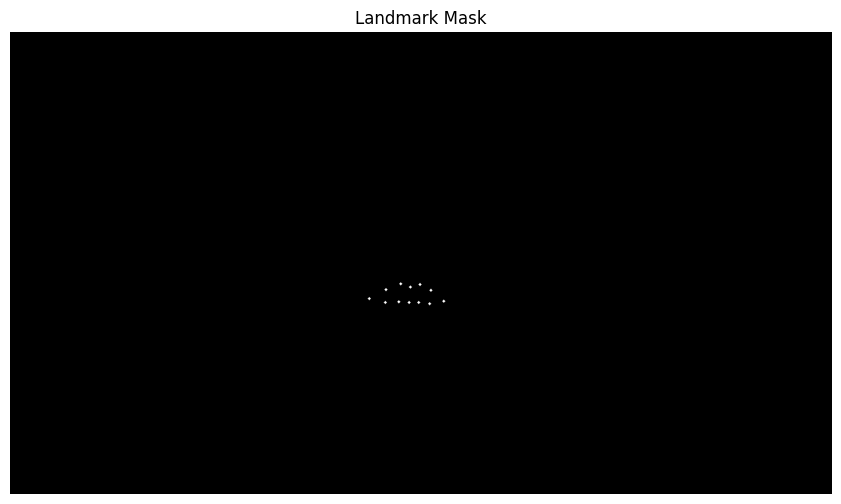

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def apply_kernel(image, kernel):
    """
    Apply the given convolution kernel to an image.

    Parameters:
        image (numpy.ndarray): The input image to which the kernel is applied.
        kernel (numpy.ndarray): The convolution kernel.

    Returns:
        numpy.ndarray: The convolved image.
    """
    # Apply the kernel to the image using the cv2.filter2D function
    convolved = cv2.filter2D(image, -1, kernel)
    return convolved


def create_landmark_mask(image_shape, landmarks):
    # Create an empty mask
    mask = np.zeros(image_shape[:2], dtype=np.uint8)

    # Mark the landmark points on the mask
    for (x, y) in landmarks:
        cv2.circle(mask, (x, y), radius=2, color=255, thickness=-1)

    return mask

# Example usage
landmark_mask = create_landmark_mask(image.shape, outer_lip_landmarks)

# Display the original mask and the convolved result
plt.figure(figsize=(12, 6))
plt.imshow(landmark_mask, cmap='gray')
plt.title('Landmark Mask')
plt.axis('off')
plt.show()


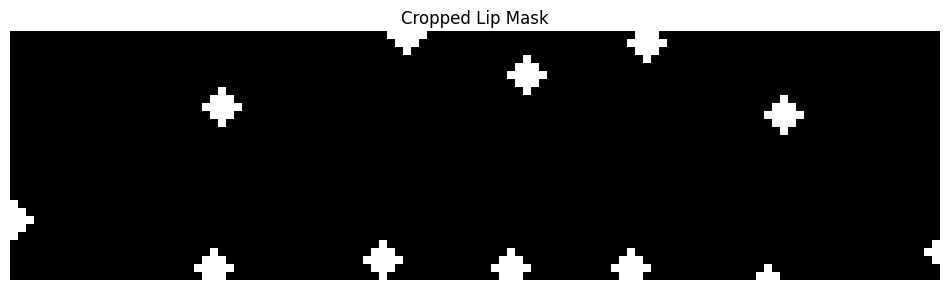

In [ ]:
def crop_lip_region(image, landmarks):
    """
    Crop the region around the lip based on the landmarks.

    Parameters:
        image (numpy.ndarray): The original image.
        landmarks (list of tuples): The list of landmark points.

    Returns:
        numpy.ndarray: The cropped lip region.
        tuple: The coordinates of the top-left corner of the cropped region (x_min, y_min).
    """
    # Get the bounding box for the lip landmarks
    x_min = min([point[0] for point in landmarks])
    y_min = min([point[1] for point in landmarks])
    x_max = max([point[0] for point in landmarks])
    y_max = max([point[1] for point in landmarks])

    # Crop the lip region from the image
    cropped_lip = image[y_min:y_max, x_min:x_max]

    return cropped_lip, (x_min, y_min)

# Crop the lip region from the landmark mask
cropped_lip_mask, (x_min, y_min) = crop_lip_region(landmark_mask, outer_lip_landmarks)


# Display the cropped lip region and the convolved result
plt.figure(figsize=(12, 6))
plt.imshow(cropped_lip_mask, cmap='gray')
plt.title('Cropped Lip Mask')
plt.axis('off')
plt.show()


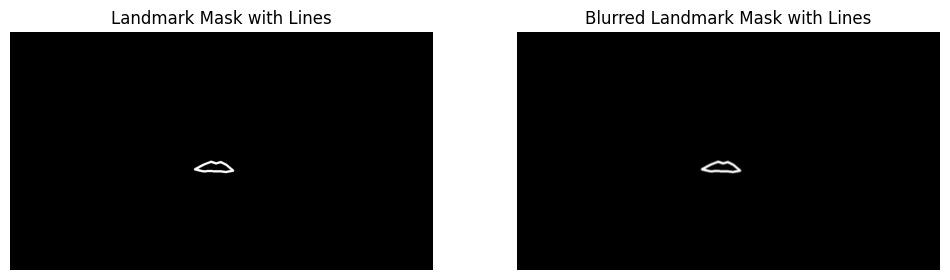

In [ ]:
def create_landmark_mask_with_lines(image_shape, landmarks, radius=5, is_closed=True):
    """
    Create a mask for the given landmarks, drawing lines between them.

    Parameters:
        image_shape (tuple): The shape of the original image.
        landmarks (list of tuples): The list of landmark points.
        radius (int): Radius of the points for visualization.
        is_closed (bool): Whether to close the contour.

    Returns:
        numpy.ndarray: The mask with lines connecting the landmark points.
    """
    # Create an empty mask
    mask = np.zeros(image_shape[:2], dtype=np.uint8)

    # Convert landmarks to a format suitable for drawing polylines
    points = np.array(landmarks, np.int32).reshape((-1, 1, 2))

    # Draw lines connecting the landmarks
    cv2.polylines(mask, [points], isClosed=is_closed, color=255, thickness=radius)

    return mask

# Example usage
landmark_mask_with_lines = create_landmark_mask_with_lines(image.shape, outer_lip_landmarks, radius=5)

# Optionally, apply Gaussian blur to smooth the mask
blurred_mask_with_lines = cv2.GaussianBlur(landmark_mask_with_lines, (5, 5), sigmaX=2)

# Display the mask with lines and the blurred version
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(landmark_mask_with_lines, cmap='gray')
plt.title('Landmark Mask with Lines')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_mask_with_lines, cmap='gray')
plt.title('Blurred Landmark Mask with Lines')
plt.axis('off')

plt.show()


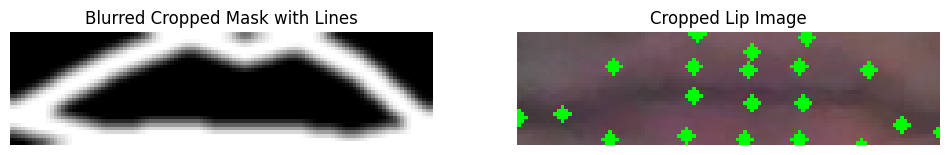

In [ ]:
def crop_and_create_landmark_mask(image, landmarks, radius=5, is_closed=True):
    """
    Crop the region around the lip based on the landmarks and create a mask with lines.

    Parameters:
        image (numpy.ndarray): The original image.
        landmarks (list of tuples): The list of landmark points.
        radius (int): Radius of the points for visualization.
        is_closed (bool): Whether to close the contour.

    Returns:
        numpy.ndarray: The cropped lip region mask with lines connecting the landmark points.
        numpy.ndarray: The cropped original image of the lip region.
    """
    # Get the bounding box for the lip landmarks
    x_min = min([point[0] for point in landmarks])
    y_min = min([point[1] for point in landmarks])
    x_max = max([point[0] for point in landmarks])
    y_max = max([point[1] for point in landmarks])

    # Crop the lip region from the original image
    cropped_image = image[y_min:y_max, x_min:x_max]

    # Create an empty mask with the shape of the cropped region
    cropped_mask = np.zeros((y_max - y_min, x_max - x_min), dtype=np.uint8)

    # Adjust landmarks to the cropped region
    adjusted_landmarks = [(x - x_min, y - y_min) for (x, y) in landmarks]

    # Convert adjusted landmarks to a format suitable for drawing polylines
    points = np.array(adjusted_landmarks, np.int32).reshape((-1, 1, 2))

    # Draw lines connecting the landmarks
    cv2.polylines(cropped_mask, [points], isClosed=is_closed, color=255, thickness=radius)

    return cropped_mask, cropped_image

# Example usage
cropped_mask_with_lines, cropped_lip_image = crop_and_create_landmark_mask(image, outer_lip_landmarks, radius=5)

# Optionally, apply Gaussian blur to smooth the mask
blurred_cropped_mask_with_lines = cv2.GaussianBlur(cropped_mask_with_lines, (5, 5), sigmaX=2)

# Display the cropped mask with lines and the original cropped image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(blurred_cropped_mask_with_lines, cmap='gray')
plt.title('Blurred Cropped Mask with Lines')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cropped_lip_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Lip Image')
plt.axis('off')

plt.show()


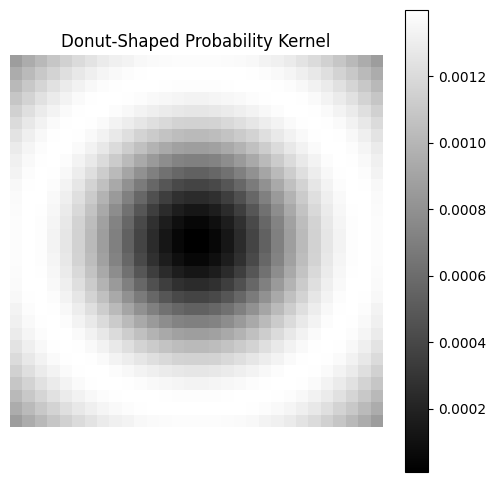

In [ ]:
# This is the main part of the solution technique. Basically a kernel to filter the mouth shape to determine if it is rounded shape.
# By playing with the parameters, the filter can be adjusted.
def create_donut_shaped_kernel(size, sigma_outer, sigma_inner):
    """
    Create a donut-shaped kernel with a Gaussian profile.

    Parameters:
        size (int): The diameter of the kernel.
        sigma_outer (float): The standard deviation of the outer Gaussian.
        sigma_inner (float): The standard deviation of the inner Gaussian.

    Returns:
        numpy.ndarray: The donut-shaped kernel.
    """
    # Create a 2D Gaussian for the outer ring
    x = np.linspace(-size // 2, size // 2, size)
    y = np.linspace(-size // 2, size // 2, size)
    x, y = np.meshgrid(x, y)
    gaussian_outer = np.exp(-(x**2 + y**2) / (2 * sigma_outer**2))

    # Create a 2D Gaussian for the inner subtraction
    gaussian_inner = np.exp(-(x**2 + y**2) / (2 * sigma_inner**2))

    # Subtract the inner Gaussian from the outer Gaussian to create a donut shape
    donut_kernel = gaussian_outer - gaussian_inner

    # Normalize the kernel to make the sum equal to 1 (probability distribution)
    donut_kernel /= np.sum(np.abs(donut_kernel))

    return donut_kernel

# Example usage
donut_kernel = create_donut_shaped_kernel(size=30, sigma_outer=10, sigma_inner=9.7)

# Display the donut-shaped kernel
plt.figure(figsize=(6, 6))
plt.imshow(donut_kernel, cmap='gray')
plt.title('Donut-Shaped Probability Kernel')
plt.colorbar()
plt.axis('off')
plt.show()


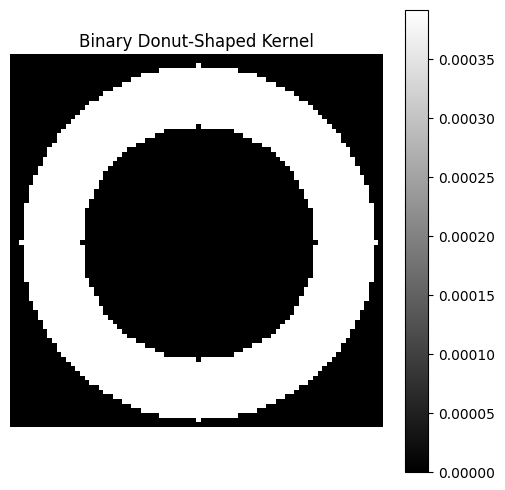

In [ ]:
def create_binary_donut_kernel(size, outer_radius, inner_radius):
    """
    Create a binary donut-shaped kernel.

    Parameters:
        size (int): The diameter of the kernel.
        outer_radius (float): The radius of the outer circle.
        inner_radius (float): The radius of the inner circle to be subtracted.

    Returns:
        numpy.ndarray: The binary donut-shaped kernel.
    """
    # Create an empty kernel
    kernel = np.zeros((size, size), dtype=np.float32)
    center = size // 2

    # Create the outer circular mask
    for i in range(size):
        for j in range(size):
            if (i - center)**2 + (j - center)**2 <= outer_radius**2:
                kernel[i, j] = 1

    # Subtract the inner circular mask
    for i in range(size):
        for j in range(size):
            if (i - center)**2 + (j - center)**2 <= inner_radius**2:
                kernel[i, j] = 0

    # Normalize the kernel
    kernel /= np.sum(kernel)

    return kernel

# Example usage for a binary donut
binary_donut_kernel = create_binary_donut_kernel(size=80, outer_radius=38, inner_radius=25)

# Display the binary donut-shaped kernel
plt.figure(figsize=(6, 6))
plt.imshow(binary_donut_kernel, cmap='gray')
plt.title('Binary Donut-Shaped Kernel')
plt.colorbar()
plt.axis('off')
plt.show()


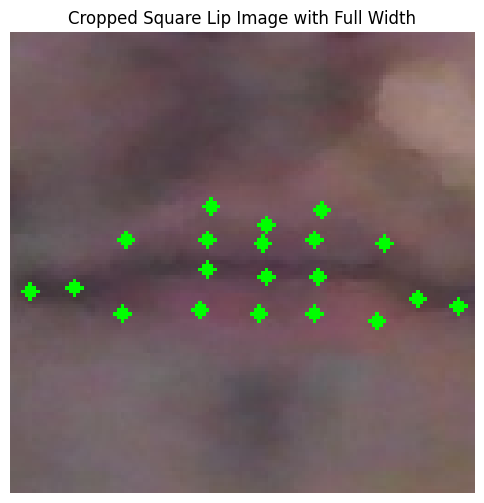

In [ ]:
def crop_lip_to_square_with_full_width(image, landmarks, padding=0):
    """
    Crop the region around the lip based on the landmarks, keeping the full width,
    and adjusting the height to make the crop square.

    Parameters:
        image (numpy.ndarray): The original image.
        landmarks (list of tuples): The list of landmark points.
        padding (int): Additional padding to add around the cropped region.

    Returns:
        numpy.ndarray: The cropped square lip region.
    """
    # Get the bounding box for the lip landmarks
    x_min = min([point[0] for point in landmarks]) - padding
    y_min = min([point[1] for point in landmarks]) - padding
    x_max = max([point[0] for point in landmarks]) + padding
    y_max = max([point[1] for point in landmarks]) + padding

    # Ensure the coordinates are within image boundaries
    x_min = max(x_min, 0)
    y_min = max(y_min, 0)
    x_max = min(x_max, image.shape[1])
    y_max = min(y_max, image.shape[0])

    # Calculate the width and height of the cropped region
    width = x_max - x_min
    height = y_max - y_min

    # Make the cropped region square by expanding the height
    if width > height:
        # Calculate the additional height needed to make it square
        diff = (width - height) // 2
        y_min = max(y_min - diff, 0)
        y_max = min(y_max + diff, image.shape[0])

    # Crop the square region from the original image
    cropped_square = image[y_min:y_max, x_min:x_max]

    return cropped_square

# Example usage
cropped_square_lip_with_full_width = crop_lip_to_square_with_full_width(image, outer_lip_landmarks, padding=5)

# Display the cropped square lip with full width
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(cropped_square_lip_with_full_width, cv2.COLOR_BGR2RGB))
plt.title('Cropped Square Lip Image with Full Width')
plt.axis('off')
plt.show()


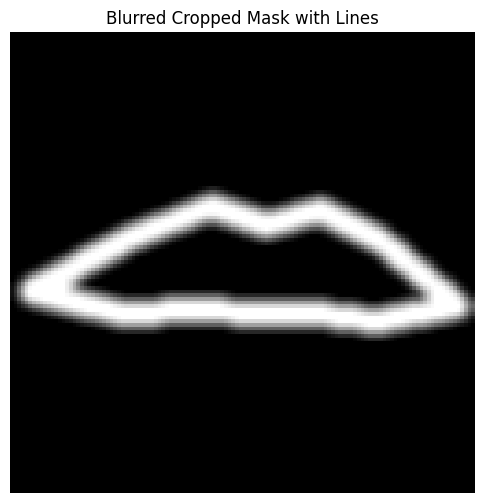

In [ ]:
def create_landmark_mask_with_lines(image_shape, landmarks, radius=5, is_closed=True):
    """
    Create a mask for the given landmarks, drawing lines between them.

    Parameters:
        image_shape (tuple): The shape of the original image.
        landmarks (list of tuples): The list of landmark points.
        radius (int): Radius of the points for visualization.
        is_closed (bool): Whether to close the contour.

    Returns:
        numpy.ndarray: The mask with lines connecting the landmark points.
    """
    # Create an empty mask
    mask = np.zeros(image_shape[:2], dtype=np.uint8)

    # Convert landmarks to a format suitable for drawing polylines
    points = np.array(landmarks, np.int32).reshape((-1, 1, 2))

    # Draw lines connecting the landmarks
    cv2.polylines(mask, [points], isClosed=is_closed, color=255, thickness=radius)

    return mask

def crop_mask_to_square_with_full_width(mask, landmarks, padding=0):
    """
    Crop the mask to a square region with the full width, adjusted to include the mouth.

    Parameters:
        mask (numpy.ndarray): The mask with lines.
        landmarks (list of tuples): The list of landmark points.
        padding (int): Additional padding to add around the cropped region.

    Returns:
        numpy.ndarray: The cropped square mask.
    """
    # Use the same cropping logic as the function to crop the image
    return crop_lip_to_square_with_full_width(mask, landmarks, padding)

# Create the initial landmark mask with lines
landmark_mask_with_lines = create_landmark_mask_with_lines(image.shape, outer_lip_landmarks, radius=5)

# Crop the mask to a square region
cropped_mask_with_lines = crop_mask_to_square_with_full_width(landmark_mask_with_lines, outer_lip_landmarks, padding=5)

# Apply Gaussian blur to the cropped mask
blurred_cropped_mask_with_lines = cv2.GaussianBlur(cropped_mask_with_lines, (5, 5), sigmaX=2)

# Display the blurred mask
plt.figure(figsize=(6, 6))
plt.imshow(blurred_cropped_mask_with_lines, cmap='gray')
plt.title('Blurred Cropped Mask with Lines')
plt.axis('off')
plt.show()


In [ ]:
def resize_kernel_to_match(masked_image, filter_kernel):
    """
    Resize the filter kernel to match the dimensions of the masked image.

    Parameters:
        masked_image (numpy.ndarray): The masked lip image.
        filter_kernel (numpy.ndarray): The filter kernel to be resized.

    Returns:
        numpy.ndarray: The resized filter kernel.
    """
    # Resize the filter kernel to match the shape of the masked image
    resized_kernel = cv2.resize(filter_kernel, (masked_image.shape[1], masked_image.shape[0]), interpolation=cv2.INTER_AREA)
    return resized_kernel

def calculate_dot_product_probability(masked_image, filter_kernel):
    """
    Calculate the dot product probability between the masked image and the filter.

    Parameters:
        masked_image (numpy.ndarray): The normalized masked lip image.
        filter_kernel (numpy.ndarray): The normalized filter kernel.

    Returns:
        float: The dot product similarity as a probability.
    """
    # Resize the kernel to match the shape of the masked image
    resized_kernel = resize_kernel_to_match(masked_image, filter_kernel)

    # Normalize the masked image and the filter
    masked_image_norm = masked_image / np.max(masked_image)
    resized_kernel_norm = resized_kernel / np.max(resized_kernel)

    # Flatten both arrays
    masked_image_flat = masked_image_norm.flatten()
    resized_kernel_flat = resized_kernel_norm.flatten()

    # Calculate the dot product
    dot_product = np.dot(masked_image_flat, resized_kernel_flat)

    # Normalize the result to get a probability (values between 0 and 1)
    probability = dot_product / (np.linalg.norm(masked_image_flat) * np.linalg.norm(resized_kernel_flat))

    return probability

# Example usage
probability_of_round_lip = calculate_dot_product_probability(blurred_cropped_mask_with_lines, donut_kernel)

print(f"Probability of a round lip shape: {probability_of_round_lip:.2f}")


# here, instead of binary_donut_kernel, donut_kernel can be used, but, it is not yet perfected and maybe it will not be perfect ever.
# I think solution should include aspect ratio value. There is a function calculating above.

Probability of a round lip shape: 0.27


In [ ]:
# After this scoring part, we should normalize the values as the values are not between 0 and 1, but rather are between 0.20,0.80.
# We need to map the values into 0 and 1.
# It will not be a "probability" per se. It will be the score of the technique.